In [45]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/anthropic-econ-index-train/anthropic_econ_index.train (1).txt
/kaggle/input/a100-chat-benchmark/A100_chat_benchmark.txt


In [46]:
df = pd.read_csv("/kaggle/input/anthropic-econ-index-train/anthropic_econ_index.train (1).txt", sep=',')

In [47]:
df.head()

,task_name,feedback_loop,directive,task_iteration,validation,learning,filtered
0,accept commissions to create music for special...,0.0,0.000000,0.000000,0.0,0.0,1.000000
1,act as advisers to student organizations.,0.0,0.382979,0.361702,0.0,0.0,0.255319
2,act as an advocate for farmers or farmers' gro...,0.0,0.000000,0.000000,0.0,0.0,1.000000
3,act as an intermediary in negotiations between...,0.0,0.391304,0.434783,0.0,0.0,0.173913
4,act as an intermediary in negotiations between...,0.0,0.391304,0.376812,0.0,0.0,0.231884


In [48]:
df.shape

(3364, 7)

In [49]:
df['feedback_loop'].value_counts()

feedback_loop
0.000000    2887
0.200000       3
0.211268       2
0.174312       2
0.250000       2
            ... 
0.506885       1
0.024188       1
0.172662       1
0.075415       1
0.221613       1
Name: count, Length: 469, dtype: int64

In [50]:
df.nunique()

task_name         3364
feedback_loop      469
directive         1376
task_iteration    1295
validation         358
learning          1292
filtered          1543
dtype: int64

In [51]:
df['feedback_loop'].quantile(1)

0.6666666666666666

In [52]:
df.columns

Index(['task_name', 'feedback_loop', 'directive', 'task_iteration',
       'validation', 'learning', 'filtered'],
      dtype='object')

In [53]:
#frequency table of each task type. excluding filtered

In [54]:
frequency_df = (df.iloc[:, 1:6] > 0).sum()

In [55]:
frequency_df

feedback_loop      477
directive         1749
task_iteration    1542
validation         359
learning          1560
dtype: int64

Text(0, 0.5, 'Frequency')

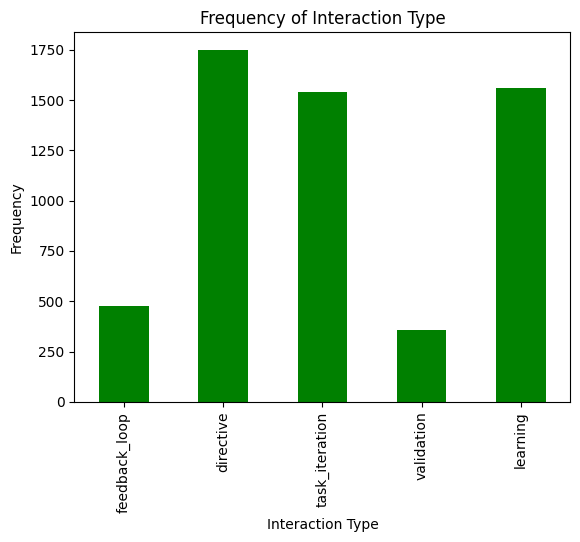

In [56]:
freq_bar = frequency_df.plot(kind='bar', color='green')
plt.title('Frequency of Interaction Type')
plt.xlabel('Interaction Type')
plt.ylabel('Frequency')

In [57]:
import pandas as pd
import re
import json

# Example: your Google Doc text
text = """
{
  "Model": "ali-vilab/i2vgen-xl",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "Energy/video (J)": 16915.850124999997,
  "Batch latency (s)": 46.14208295941353,
  "Batch size": 1,
  "Denoising steps": 25,
  "Frames": 16
}
{
  "Model": "ali-vilab/i2vgen-xl",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "Energy/video (J)": 16496.045437499997,
  "Batch latency (s)": 89.03019031882286,
  "Batch size": 2,
  "Denoising steps": 25,
  "Frames": 16
}
{
  "Model": "stabilityai/stable-video-diffusion-img2vid-xt",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "Energy/video (J)": 15709.767625000095,
  "Batch latency (s)": 42.397395104169846,
  "Batch size": 1,
  "Denoising steps": 25,
  "Frames": 25
}
{
  "Model": "stabilityai/stable-video-diffusion-img2vid-xt",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "Energy/video (J)": 15291.016625000047,
  "Batch latency (s)": 82.90474811196327,
  "Batch size": 2,
  "Denoising steps": 25,
  "Frames": 25
}
{
  "Model": "stabilityai/stable-video-diffusion-img2vid-xt",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "Energy/video (J)": 14761.389999999976,
  "Batch latency (s)": 120.65004900523594,
  "Batch size": 3,
  "Denoising steps": 25,
  "Frames": 25
}
{
  "Model": "stabilityai/stable-video-diffusion-img2vid",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "Energy/video (J)": 9066.434124999912,
  "Batch latency (s)": 24.369865357875824,
  "Batch size": 1,
  "Denoising steps": 25,
  "Frames": 14
}
{
  "Model": "stabilityai/stable-video-diffusion-img2vid",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "Energy/video (J)": 8835.22312499996,
  "Batch latency (s)": 47.65615049004555,
  "Batch size": 2,
  "Denoising steps": 25,
  "Frames": 14
}
{
  "Model": "stabilityai/stable-video-diffusion-img2vid",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "Energy/video (J)": 8683.536285714292,
  "Batch latency (s)": 70.55723374230521,
  "Batch size": 3,
  "Denoising steps": 25,
  "Frames": 14
}
{
  "Model": "kandinsky-community/kandinsky-2-2-decoder",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "Energy/image (J)": 324.06850000005215,
  "Batch latency (s)": 1.6537675857543945,
  "Batch size": 1,
  "Denoising steps": 25
}
{
  "Model": "kandinsky-community/kandinsky-2-2-decoder",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "Energy/image (J)": 172.51030000000029,
  "Batch latency (s)": 7.375234842300415,
  "Batch size": 16,
  "Denoising steps": 25
}
{
  "Model": "kandinsky-community/kandinsky-2-2-decoder",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "Energy/image (J)": 230.3378000000026,
  "Batch latency (s)": 1.5861663103103638,
  "Batch size": 2,
  "Denoising steps": 25
}
{
  "Model": "kandinsky-community/kandinsky-2-2-decoder",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "Energy/image (J)": 163.0797656249997,
  "Batch latency (s)": 13.998618459701538,
  "Batch size": 32,
  "Denoising steps": 25
}
{
  "Model": "kandinsky-community/kandinsky-2-2-decoder",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "Energy/image (J)": 200.16462499999906,
  "Batch latency (s)": 2.299217462539673,
  "Batch size": 4,
  "Denoising steps": 25
}
{
  "Model": "kandinsky-community/kandinsky-2-2-decoder",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "Energy/image (J)": 184.9021625000052,
  "Batch latency (s)": 4.0124232292175295,
  "Batch size": 8,
  "Denoising steps": 25
}
{
  "Model": "kandinsky-community/kandinsky-3",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "Energy/image (J)": 930.2532999999821,
  "Batch latency (s)": 3.0359585523605346,
  "Batch size": 1,
  "Denoising steps": 25
}
{
  "Model": "kandinsky-community/kandinsky-3",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "Energy/image (J)": 895.7575500000036,
  "Batch latency (s)": 5.261959171295166,
  "Batch size": 2,
  "Denoising steps": 25
}
{
  "Model": "prompthero/openjourney-v4",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "Energy/image (J)": 227.21699999999254,
  "Batch latency (s)": 0.9210062503814698,
  "Batch size": 1,
  "Denoising steps": 25
}
{
  "Model": "prompthero/openjourney-v4",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "Energy/image (J)": 156.51368749999673,
  "Batch latency (s)": 6.559858226776123,
  "Batch size": 16,
  "Denoising steps": 25
}
{
  "Model": "prompthero/openjourney-v4",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "Energy/image (J)": 188.78500000000932,
  "Batch latency (s)": 1.1187455892562865,
  "Batch size": 2,
  "Denoising steps": 25
}
{
  "Model": "prompthero/openjourney-v4",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "Energy/image (J)": 154.23499999999768,
  "Batch latency (s)": 12.850126147270203,
  "Batch size": 32,
  "Denoising steps": 25
}
{
  "Model": "prompthero/openjourney-v4",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "Energy/image (J)": 175.33082500000017,
  "Batch latency (s)": 1.8664743423461914,
  "Batch size": 4,
  "Denoising steps": 25
}
{
  "Model": "prompthero/openjourney-v4",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "Energy/image (J)": 150.57691875000017,
  "Batch latency (s)": 25.000647592544556,
  "Batch size": 64,
  "Denoising steps": 25
}
{
  "Model": "prompthero/openjourney-v4",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "Energy/image (J)": 163.7534500000067,
  "Batch latency (s)": 3.423132634162903,
  "Batch size": 8,
  "Denoising steps": 25
}
{
  "Model": "segmind/SSD-1B",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "Energy/image (J)": 745.7899999999441,
  "Batch latency (s)": 1.9644724607467652,
  "Batch size": 1,
  "Denoising steps": 25
}
{
  "Model": "segmind/SSD-1B",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "Energy/image (J)": 700.4580500000156,
  "Batch latency (s)": 3.6897377252578734,
  "Batch size": 2,
  "Denoising steps": 25
}
{
  "Model": "segmind/SSD-1B",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "Energy/image (J)": 688.6121250000084,
  "Batch latency (s)": 7.168970584869385,
  "Batch size": 4,
  "Denoising steps": 25
}
{
  "Model": "segmind/SSD-1B",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "Energy/image (J)": 697.7047875000047,
  "Batch latency (s)": 14.703205680847168,
  "Batch size": 8,
  "Denoising steps": 25
}
{
  "Model": "stabilityai/sdxl-turbo",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "Energy/image (J)": 414.02970000002534,
  "Batch latency (s)": 2.0992990016937254,
  "Batch size": 1,
  "Denoising steps": 25
}
{
  "Model": "stabilityai/sdxl-turbo",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "Energy/image (J)": 242.709375,
  "Batch latency (s)": 9.941586756706238,
  "Batch size": 16,
  "Denoising steps": 25
}
{
  "Model": "stabilityai/sdxl-turbo",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "Energy/image (J)": 343.14144999999553,
  "Batch latency (s)": 2.6075665235519407,
  "Batch size": 2,
  "Denoising steps": 25
}
{
  "Model": "stabilityai/sdxl-turbo",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "Energy/image (J)": 260.6321250000037,
  "Batch latency (s)": 2.6943087577819824,
  "Batch size": 4,
  "Denoising steps": 25
}
{
  "Model": "stabilityai/sdxl-turbo",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "Energy/image (J)": 239.71523749999469,
  "Batch latency (s)": 4.928032088279724,
  "Batch size": 8,
  "Denoising steps": 25
}
{
  "Model": "stabilityai/stable-diffusion-2-1",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "Energy/image (J)": 431.7285000000149,
  "Batch latency (s)": 1.1978053092956542,
  "Batch size": 1,
  "Denoising steps": 25
}
{
  "Model": "stabilityai/stable-diffusion-2-1",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "Energy/image (J)": 349.6556749999989,
  "Batch latency (s)": 14.506024074554443,
  "Batch size": 16,
  "Denoising steps": 25
}
{
  "Model": "stabilityai/stable-diffusion-2-1",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "Energy/image (J)": 397.4403999999631,
  "Batch latency (s)": 2.0987526416778564,
  "Batch size": 2,
  "Denoising steps": 25
}
{
  "Model": "stabilityai/stable-diffusion-2-1",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "Energy/image (J)": 344.0007781249995,
  "Batch latency (s)": 28.606084370613097,
  "Batch size": 32,
  "Denoising steps": 25
}
{
  "Model": "stabilityai/stable-diffusion-2-1",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "Energy/image (J)": 370.8419500000076,
  "Batch latency (s)": 3.870126795768738,
  "Batch size": 4,
  "Denoising steps": 25
}
{
  "Model": "stabilityai/stable-diffusion-2-1",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "Energy/image (J)": 357.5101125000045,
  "Batch latency (s)": 7.4118963241577145,
  "Batch size": 8,
  "Denoising steps": 25
}
{
  "Model": "stabilityai/stable-diffusion-3-medium-diffusers",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "Energy/image (J)": 1457.9797000000253,
  "Batch latency (s)": 3.7812204360961914,
  "Batch size": 1,
  "Denoising steps": 25
}
{
  "Model": "stabilityai/stable-diffusion-3-medium-diffusers",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "Energy/image (J)": 1417.0265999999829,
  "Batch latency (s)": 7.296204352378846,
  "Batch size": 2,
  "Denoising steps": 25
}
{
  "Model": "stabilityai/stable-diffusion-3-medium-diffusers",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "Energy/image (J)": 1376.6305249999975,
  "Batch latency (s)": 14.180507826805115,
  "Batch size": 4,
  "Denoising steps": 25
}
{
  "Model": "stabilityai/stable-diffusion-3-medium-diffusers",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "Energy/image (J)": 1353.8191374999938,
  "Batch latency (s)": 28.03936712741852,
  "Batch size": 8,
  "Denoising steps": 25
}
{
  "Model": "stabilityai/stable-diffusion-xl-base-1.0",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "Energy/image (J)": 1104.114100000076,
  "Batch latency (s)": 2.8582629680633547,
  "Batch size": 1,
  "Denoising steps": 25
}
{
  "Model": "stabilityai/stable-diffusion-xl-base-1.0",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "Energy/image (J)": 1023.2370500000194,
  "Batch latency (s)": 5.309733629226685,
  "Batch size": 2,
  "Denoising steps": 25
}
{
  "Model": "stabilityai/stable-diffusion-xl-base-1.0",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "Energy/image (J)": 1028.9778500000016,
  "Batch latency (s)": 10.595553398132324,
  "Batch size": 4,
  "Denoising steps": 25
}
{
  "Model": "stabilityai/stable-diffusion-xl-base-1.0",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "Energy/image (J)": 1039.4479500000016,
  "Batch latency (s)": 21.538306522369385,
  "Batch size": 8,
  "Denoising steps": 25
}
{
  "Model": "kandinsky-community/kandinsky-2-2-decoder",
  "GPU": "NVIDIA H100 80GB HBM3",
  "Energy/image (J)": 316.22510000001637,
  "Batch latency (s)": 1.2899317026138306,
  "Batch size": 1,
  "Denoising steps": 25
}
{
  "Model": "kandinsky-community/kandinsky-2-2-decoder",
  "GPU": "NVIDIA H100 80GB HBM3",
  "Energy/image (J)": 145.30115625000326,
  "Batch latency (s)": 3.6781134366989137,
  "Batch size": 16,
  "Denoising steps": 25
}
{
  "Model": "kandinsky-community/kandinsky-2-2-decoder",
  "GPU": "NVIDIA H100 80GB HBM3",
  "Energy/image (J)": 221.32535000001081,
  "Batch latency (s)": 1.3821177244186402,
  "Batch size": 2,
  "Denoising steps": 25
}
{
  "Model": "kandinsky-community/kandinsky-2-2-decoder",
  "GPU": "NVIDIA H100 80GB HBM3",
  "Energy/image (J)": 135.961328125,
  "Batch latency (s)": 6.7253422975540165,
  "Batch size": 32,
  "Denoising steps": 25
}
{
  "Model": "kandinsky-community/kandinsky-2-2-decoder",
  "GPU": "NVIDIA H100 80GB HBM3",
  "Energy/image (J)": 173.91712500001304,
  "Batch latency (s)": 1.573417329788208,
  "Batch size": 4,
  "Denoising steps": 25
}
{
  "Model": "kandinsky-community/kandinsky-2-2-decoder",
  "GPU": "NVIDIA H100 80GB HBM3",
  "Energy/image (J)": 130.85997968750016,
  "Batch latency (s)": 12.837305545806885,
  "Batch size": 64,
  "Denoising steps": 25
}
{
  "Model": "kandinsky-community/kandinsky-2-2-decoder",
  "GPU": "NVIDIA H100 80GB HBM3",
  "Energy/image (J)": 155.19958750000222,
  "Batch latency (s)": 2.1782283782958984,
  "Batch size": 8,
  "Denoising steps": 25
}
{
  "Model": "kandinsky-community/kandinsky-3",
  "GPU": "NVIDIA H100 80GB HBM3",
  "Energy/image (J)": 848.3177000001073,
  "Batch latency (s)": 2.351728391647339,
  "Batch size": 1,
  "Denoising steps": 25
}
{
  "Model": "kandinsky-community/kandinsky-3",
  "GPU": "NVIDIA H100 80GB HBM3",
  "Energy/image (J)": 716.0031000000424,
  "Batch latency (s)": 2.8724076986312865,
  "Batch size": 2,
  "Denoising steps": 25
}
{
  "Model": "kandinsky-community/kandinsky-3",
  "GPU": "NVIDIA H100 80GB HBM3",
  "Energy/image (J)": 682.126500000013,
  "Batch latency (s)": 4.641835880279541,
  "Batch size": 4,
  "Denoising steps": 25
}
{
  "Model": "kandinsky-community/kandinsky-3",
  "GPU": "NVIDIA H100 80GB HBM3",
  "Energy/image (J)": 655.685175000003,
  "Batch latency (s)": 8.430445384979247,
  "Batch size": 8,
  "Denoising steps": 25
}
{
  "Model": "prompthero/openjourney-v4",
  "GPU": "NVIDIA H100 80GB HBM3",
  "Energy/image (J)": 232.24340000003576,
  "Batch latency (s)": 0.8665567636489868,
  "Batch size": 1,
  "Denoising steps": 25
}
{
  "Model": "prompthero/openjourney-v4",
  "GPU": "NVIDIA H100 80GB HBM3",
  "Energy/image (J)": 135.34282499999972,
  "Batch latency (s)": 3.239760994911194,
  "Batch size": 16,
  "Denoising steps": 25
}
{
  "Model": "prompthero/openjourney-v4",
  "GPU": "NVIDIA H100 80GB HBM3",
  "Energy/image (J)": 175.78234999999404,
  "Batch latency (s)": 0.9105970144271851,
  "Batch size": 2,
  "Denoising steps": 25
}
{
  "Model": "prompthero/openjourney-v4",
  "GPU": "NVIDIA H100 80GB HBM3",
  "Energy/image (J)": 130.1285124999995,
  "Batch latency (s)": 6.225514149665832,
  "Batch size": 32,
  "Denoising steps": 25
}
{
  "Model": "prompthero/openjourney-v4",
  "GPU": "NVIDIA H100 80GB HBM3",
  "Energy/image (J)": 148.74832499998155,
  "Batch latency (s)": 1.1036246299743653,
  "Batch size": 4,
  "Denoising steps": 25
}
{
  "Model": "prompthero/openjourney-v4",
  "GPU": "NVIDIA H100 80GB HBM3",
  "Energy/image (J)": 128.0899343750003,
  "Batch latency (s)": 12.070884728431702,
  "Batch size": 64,
  "Denoising steps": 25
}
{
  "Model": "prompthero/openjourney-v4",
  "GPU": "NVIDIA H100 80GB HBM3",
  "Energy/image (J)": 139.91437499999302,
  "Batch latency (s)": 1.74277982711792,
  "Batch size": 8,
  "Denoising steps": 25
}
{
  "Model": "segmind/SSD-1B",
  "GPU": "NVIDIA H100 80GB HBM3",
  "Energy/image (J)": 666.479899999965,
  "Batch latency (s)": 1.3885040760040284,
  "Batch size": 1,
  "Denoising steps": 25
}
{
  "Model": "segmind/SSD-1B",
  "GPU": "NVIDIA H100 80GB HBM3",
  "Energy/image (J)": 513.199212499999,
  "Batch latency (s)": 12.176180934906006,
  "Batch size": 16,
  "Denoising steps": 25
}
{
  "Model": "segmind/SSD-1B",
  "GPU": "NVIDIA H100 80GB HBM3",
  "Energy/image (J)": 592.11455000001,
  "Batch latency (s)": 1.8233376026153565,
  "Batch size": 2,
  "Denoising steps": 25
}
{
  "Model": "segmind/SSD-1B",
  "GPU": "NVIDIA H100 80GB HBM3",
  "Energy/image (J)": 544.8429999999935,
  "Batch latency (s)": 3.286959099769592,
  "Batch size": 4,
  "Denoising steps": 25
}
{
  "Model": "segmind/SSD-1B",
  "GPU": "NVIDIA H100 80GB HBM3",
  "Energy/image (J)": 522.7006874999963,
  "Batch latency (s)": 6.223434543609619,
  "Batch size": 8,
  "Denoising steps": 25
}
{
  "Model": "stabilityai/sdxl-turbo",
  "GPU": "NVIDIA H100 80GB HBM3",
  "Energy/image (J)": 419.5822999998927,
  "Batch latency (s)": 1.9746390342712403,
  "Batch size": 1,
  "Denoising steps": 25
}
{
  "Model": "stabilityai/sdxl-turbo",
  "GPU": "NVIDIA H100 80GB HBM3",
  "Energy/image (J)": 179.42289374999237,
  "Batch latency (s)": 4.241718673706055,
  "Batch size": 16,
  "Denoising steps": 25
}
{
  "Model": "stabilityai/sdxl-turbo",
  "GPU": "NVIDIA H100 80GB HBM3",
  "Energy/image (J)": 295.792149999924,
  "Batch latency (s)": 2.0774401664733886,
  "Batch size": 2,
  "Denoising steps": 25
}
{
  "Model": "stabilityai/sdxl-turbo",
  "GPU": "NVIDIA H100 80GB HBM3",
  "Energy/image (J)": 174.0245281249983,
  "Batch latency (s)": 8.14413080215454,
  "Batch size": 32,
  "Denoising steps": 25
}
{
  "Model": "stabilityai/sdxl-turbo",
  "GPU": "NVIDIA H100 80GB HBM3",
  "Energy/image (J)": 230.345924999984,
  "Batch latency (s)": 2.223876476287842,
  "Batch size": 4,
  "Denoising steps": 25
}
{
  "Model": "stabilityai/sdxl-turbo",
  "GPU": "NVIDIA H100 80GB HBM3",
  "Energy/image (J)": 166.73651874999922,
  "Batch latency (s)": 15.59785532951355,
  "Batch size": 64,
  "Denoising steps": 25
}
{
  "Model": "stabilityai/sdxl-turbo",
  "GPU": "NVIDIA H100 80GB HBM3",
  "Energy/image (J)": 198.7015374999959,
  "Batch latency (s)": 2.459192657470703,
  "Batch size": 8,
  "Denoising steps": 25
}
{
  "Model": "stabilityai/stable-diffusion-2-1",
  "GPU": "NVIDIA H100 80GB HBM3",
  "Energy/image (J)": 386.4609999999404,
  "Batch latency (s)": 0.9410791873931885,
  "Batch size": 1,
  "Denoising steps": 25
}
{
  "Model": "stabilityai/stable-diffusion-2-1",
  "GPU": "NVIDIA H100 80GB HBM3",
  "Energy/image (J)": 295.0764937500004,
  "Batch latency (s)": 7.02507450580597,
  "Batch size": 16,
  "Denoising steps": 25
}
{
  "Model": "stabilityai/stable-diffusion-2-1",
  "GPU": "NVIDIA H100 80GB HBM3",
  "Energy/image (J)": 341.5639000000432,
  "Batch latency (s)": 1.1783596992492675,
  "Batch size": 2,
  "Denoising steps": 25
}
{
  "Model": "stabilityai/stable-diffusion-2-1",
  "GPU": "NVIDIA H100 80GB HBM3",
  "Energy/image (J)": 289.42614687500173,
  "Batch latency (s)": 13.744895315170288,
  "Batch size": 32,
  "Denoising steps": 25
}
{
  "Model": "stabilityai/stable-diffusion-2-1",
  "GPU": "NVIDIA H100 80GB HBM3",
  "Energy/image (J)": 323.79292500000446,
  "Batch latency (s)": 1.9873192310333252,
  "Batch size": 4,
  "Denoising steps": 25
}
{
  "Model": "stabilityai/stable-diffusion-2-1",
  "GPU": "NVIDIA H100 80GB HBM3",
  "Energy/image (J)": 279.7018828125001,
  "Batch latency (s)": 26.282402443885804,
  "Batch size": 64,
  "Denoising steps": 25
}
{
  "Model": "stabilityai/stable-diffusion-2-1",
  "GPU": "NVIDIA H100 80GB HBM3",
  "Energy/image (J)": 305.03673749999143,
  "Batch latency (s)": 3.63439359664917,
  "Batch size": 8,
  "Denoising steps": 25
}
{
  "Model": "stabilityai/stable-diffusion-3-medium-diffusers",
  "GPU": "NVIDIA H100 80GB HBM3",
  "Energy/image (J)": 1256.9625999998302,
  "Batch latency (s)": 1.9030212879180908,
  "Batch size": 1,
  "Denoising steps": 25
}
{
  "Model": "stabilityai/stable-diffusion-3-medium-diffusers",
  "GPU": "NVIDIA H100 80GB HBM3",
  "Energy/image (J)": 1115.0813562500057,
  "Batch latency (s)": 26.295916223526,
  "Batch size": 16,
  "Denoising steps": 25
}
{
  "Model": "stabilityai/stable-diffusion-3-medium-diffusers",
  "GPU": "NVIDIA H100 80GB HBM3",
  "Energy/image (J)": 1187.2511500000953,
  "Batch latency (s)": 3.544024109840393,
  "Batch size": 2,
  "Denoising steps": 25
}
{
  "Model": "stabilityai/stable-diffusion-3-medium-diffusers",
  "GPU": "NVIDIA H100 80GB HBM3",
  "Energy/image (J)": 1111.7095656249962,
  "Batch latency (s)": 52.63584921360016,
  "Batch size": 32,
  "Denoising steps": 25
}
{
  "Model": "stabilityai/stable-diffusion-3-medium-diffusers",
  "GPU": "NVIDIA H100 80GB HBM3",
  "Energy/image (J)": 1141.1115500000305,
  "Batch latency (s)": 6.750077819824218,
  "Batch size": 4,
  "Denoising steps": 25
}
{
  "Model": "stabilityai/stable-diffusion-3-medium-diffusers",
  "GPU": "NVIDIA H100 80GB HBM3",
  "Energy/image (J)": 1124.4100500000175,
  "Batch latency (s)": 13.255334210395812,
  "Batch size": 8,
  "Denoising steps": 25
}
{
  "Model": "stabilityai/stable-diffusion-xl-base-1.0",
  "GPU": "NVIDIA H100 80GB HBM3",
  "Energy/image (J)": 969.3598000001163,
  "Batch latency (s)": 2.2578482627868652,
  "Batch size": 1,
  "Denoising steps": 25
}
{
  "Model": "stabilityai/stable-diffusion-xl-base-1.0",
  "GPU": "NVIDIA H100 80GB HBM3",
  "Energy/image (J)": 737.6392125000013,
  "Batch latency (s)": 17.373131418228148,
  "Batch size": 16,
  "Denoising steps": 25
}
{
  "Model": "stabilityai/stable-diffusion-xl-base-1.0",
  "GPU": "NVIDIA H100 80GB HBM3",
  "Energy/image (J)": 868.7413499999791,
  "Batch latency (s)": 2.683417248725891,
  "Batch size": 2,
  "Denoising steps": 25
}
{
  "Model": "stabilityai/stable-diffusion-xl-base-1.0",
  "GPU": "NVIDIA H100 80GB HBM3",
  "Energy/image (J)": 794.8234249999747,
  "Batch latency (s)": 4.7213153600692745,
  "Batch size": 4,
  "Denoising steps": 25
}
{
  "Model": "stabilityai/stable-diffusion-xl-base-1.0",
  "GPU": "NVIDIA H100 80GB HBM3",
  "Energy/image (J)": 756.267812499986,
  "Batch latency (s)": 8.936180830001831,
  "Batch size": 8,
  "Denoising steps": 25
}
{
  "Model": "ali-vilab/text-to-video-ms-1.7b",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "Energy/video (J)": 1153.5816999999806,
  "Batch latency (s)": 3.23746497631073,
  "Batch size": 1,
  "Denoising steps": 25,
  "Frames": 16
}
{
  "Model": "ali-vilab/text-to-video-ms-1.7b",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "Energy/video (J)": 1002.3830562499992,
  "Batch latency (s)": 42.21276063919068,
  "Batch size": 16,
  "Denoising steps": 25,
  "Frames": 16
}
{
  "Model": "ali-vilab/text-to-video-ms-1.7b",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "Energy/video (J)": 1088.2321500000078,
  "Batch latency (s)": 5.810182595252991,
  "Batch size": 2,
  "Denoising steps": 25,
  "Frames": 16
}
{
  "Model": "ali-vilab/text-to-video-ms-1.7b",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "Energy/video (J)": 1039.8423750000075,
  "Batch latency (s)": 10.828980302810669,
  "Batch size": 4,
  "Denoising steps": 25,
  "Frames": 16
}
{
  "Model": "ali-vilab/text-to-video-ms-1.7b",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "Energy/video (J)": 1001.8907250000047,
  "Batch latency (s)": 20.911450886726378,
  "Batch size": 8,
  "Denoising steps": 25,
  "Frames": 16
}
{
  "Model": "guoyww/animatediff-motion-adapter-v1-5-3",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "Energy/video (J)": 3808.3875,
  "Batch latency (s)": 9.97215178012848,
  "Batch size": 1,
  "Denoising steps": 25,
  "Frames": 16
}
{
  "Model": "guoyww/animatediff-motion-adapter-v1-5-3",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "Energy/video (J)": 3714.9077000000048,
  "Batch latency (s)": 19.319639086723328,
  "Batch size": 2,
  "Denoising steps": 25,
  "Frames": 16
}
{
  "Model": "guoyww/animatediff-motion-adapter-v1-5-3",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "Energy/video (J)": 3723.060124999983,
  "Batch latency (s)": 38.925279235839845,
  "Batch size": 4,
  "Denoising steps": 25,
  "Frames": 16
}
{
  "Model": "ali-vilab/text-to-video-ms-1.7b",
  "GPU": "NVIDIA H100 80GB HBM3",
  "Energy/video (J)": 956.181299999915,
  "Batch latency (s)": 1.9992478847503663,
  "Batch size": 1,
  "Denoising steps": 25,
  "Frames": 16
}
{
  "Model": "ali-vilab/text-to-video-ms-1.7b",
  "GPU": "NVIDIA H100 80GB HBM3",
  "Energy/video (J)": 812.8134187500109,
  "Batch latency (s)": 19.53088092803955,
  "Batch size": 16,
  "Denoising steps": 25,
  "Frames": 16
}
{
  "Model": "ali-vilab/text-to-video-ms-1.7b",
  "GPU": "NVIDIA H100 80GB HBM3",
  "Energy/video (J)": 894.7264999999664,
  "Batch latency (s)": 3.0091302156448365,
  "Batch size": 2,
  "Denoising steps": 25,
  "Frames": 16
}
{
  "Model": "ali-vilab/text-to-video-ms-1.7b",
  "GPU": "NVIDIA H100 80GB HBM3",
  "Energy/video (J)": 858.7707249999978,
  "Batch latency (s)": 5.359495830535889,
  "Batch size": 4,
  "Denoising steps": 25,
  "Frames": 16
}
{
  "Model": "ali-vilab/text-to-video-ms-1.7b",
  "GPU": "NVIDIA H100 80GB HBM3",
  "Energy/video (J)": 824.5901250000112,
  "Batch latency (s)": 9.995107746124267,
  "Batch size": 8,
  "Denoising steps": 25,
  "Frames": 16
}
{
  "Model": "guoyww/animatediff-motion-adapter-v1-5-3",
  "GPU": "NVIDIA H100 80GB HBM3",
  "Energy/video (J)": 3220.4186000000686,
  "Batch latency (s)": 5.014125680923462,
  "Batch size": 1,
  "Denoising steps": 25,
  "Frames": 16
}
{
  "Model": "guoyww/animatediff-motion-adapter-v1-5-3",
  "GPU": "NVIDIA H100 80GB HBM3",
  "Energy/video (J)": 3143.508899999969,
  "Batch latency (s)": 9.543243718147277,
  "Batch size": 2,
  "Denoising steps": 25,
  "Frames": 16
}
{
  "Model": "guoyww/animatediff-motion-adapter-v1-5-3",
  "GPU": "NVIDIA H100 80GB HBM3",
  "Energy/video (J)": 3071.656475000037,
  "Batch latency (s)": 18.417469120025636,
  "Batch size": 4,
  "Denoising steps": 25,
  "Frames": 16
}
{
  "Model": "google/gemma-2-27b-it",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 4,
  "PP": 1,
  "Energy/req (J)": 230.644433524673,
  "Avg TPOT (s)": 0.11220224938943191,
  "Token tput (tok/s)": 1051.3354539260472,
  "Avg Output Tokens": 392.47133333333335,
  "Avg BS (reqs)": 127.72361537073786,
  "Max BS (reqs)": 128
}
{
  "Model": "google/gemma-2-27b-it",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 4,
  "PP": 1,
  "Energy/req (J)": 210.91297042131052,
  "Avg TPOT (s)": 0.1381668020666102,
  "Token tput (tok/s)": 1185.256484695098,
  "Avg Output Tokens": 394.648,
  "Avg BS (reqs)": 191.5326982492276,
  "Max BS (reqs)": 192
}
{
  "Model": "google/gemma-2-27b-it",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 4,
  "PP": 1,
  "Energy/req (J)": 200.59133287658506,
  "Avg TPOT (s)": 0.15810873459976515,
  "Token tput (tok/s)": 1293.291614970675,
  "Avg Output Tokens": 394.17133333333334,
  "Avg BS (reqs)": 255.32562814070351,
  "Max BS (reqs)": 256
}
{
  "Model": "google/gemma-2-27b-it",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 2,
  "PP": 1,
  "Energy/req (J)": 370.6291062254569,
  "Avg TPOT (s)": 0.06324437199085364,
  "Token tput (tok/s)": 495.83848902581366,
  "Avg Output Tokens": 397.628,
  "Avg BS (reqs)": 31.92714819427148,
  "Max BS (reqs)": 32
}
{
  "Model": "google/gemma-2-27b-it",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 4,
  "PP": 1,
  "Energy/req (J)": 192.5537852124671,
  "Avg TPOT (s)": 0.18075888725665487,
  "Token tput (tok/s)": 1349.875210710857,
  "Avg Output Tokens": 394.1073333333333,
  "Avg BS (reqs)": 319.0250822368421,
  "Max BS (reqs)": 320
}
{
  "Model": "google/gemma-2-27b-it",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 4,
  "PP": 1,
  "Energy/req (J)": 171.49591690860763,
  "Avg TPOT (s)": 0.2274198635164852,
  "Token tput (tok/s)": 1478.040877843567,
  "Avg Output Tokens": 394.04333333333335,
  "Avg BS (reqs)": 494.87481698389456,
  "Max BS (reqs)": 512
}
{
  "Model": "google/gemma-2-27b-it",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 2,
  "PP": 1,
  "Energy/req (J)": 242.88948347765327,
  "Avg TPOT (s)": 0.07618884190506596,
  "Token tput (tok/s)": 762.5367068874166,
  "Avg Output Tokens": 397.644,
  "Avg BS (reqs)": 62.86171497584541,
  "Max BS (reqs)": 63
}
{
  "Model": "google/gemma-2-2b-it",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 43.65870680242352,
  "Avg TPOT (s)": 0.06883843431885941,
  "Token tput (tok/s)": 1761.8863043222862,
  "Avg Output Tokens": 484.5048,
  "Avg BS (reqs)": 127.76606114311032,
  "Max BS (reqs)": 128
}
{
  "Model": "google/gemma-2-2b-it",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 40.42051450410937,
  "Avg TPOT (s)": 0.09423605788695054,
  "Token tput (tok/s)": 1867.6682308739325,
  "Avg Output Tokens": 484.2952,
  "Avg BS (reqs)": 191.6598015823182,
  "Max BS (reqs)": 192
}
{
  "Model": "google/gemma-2-2b-it",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 40.73851499652404,
  "Avg TPOT (s)": 0.12347732592317112,
  "Token tput (tok/s)": 1839.0228060446036,
  "Avg Output Tokens": 485.4068,
  "Avg BS (reqs)": 255.5187088485627,
  "Max BS (reqs)": 256
}
{
  "Model": "google/gemma-2-2b-it",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 72.15207959222636,
  "Avg TPOT (s)": 0.030190263209418828,
  "Token tput (tok/s)": 1052.2489146419148,
  "Avg Output Tokens": 488.404,
  "Avg BS (reqs)": 31.938609136551175,
  "Max BS (reqs)": 32
}
{
  "Model": "google/gemma-2-2b-it",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 41.175775368780236,
  "Avg TPOT (s)": 0.14427379240978797,
  "Token tput (tok/s)": 1908.6796686967161,
  "Avg Output Tokens": 486.5528,
  "Avg BS (reqs)": 319.33644859813086,
  "Max BS (reqs)": 320
}
{
  "Model": "google/gemma-2-2b-it",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 39.10102600811973,
  "Avg TPOT (s)": 0.22157021407821473,
  "Token tput (tok/s)": 1818.2397621262044,
  "Avg Output Tokens": 485.448,
  "Avg BS (reqs)": 510.43924125666865,
  "Max BS (reqs)": 512
}
{
  "Model": "google/gemma-2-2b-it",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 59.363599380782645,
  "Avg TPOT (s)": 0.04150605989819262,
  "Token tput (tok/s)": 1486.0185035715515,
  "Avg Output Tokens": 483.528,
  "Avg BS (reqs)": 62.8836223143611,
  "Max BS (reqs)": 63
}
{
  "Model": "google/gemma-2-9b-it",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 68.23646588230595,
  "Avg TPOT (s)": 0.09567698657715788,
  "Token tput (tok/s)": 1219.5358652363277,
  "Avg Output Tokens": 380.6235,
  "Avg BS (reqs)": 126.59576776994031,
  "Max BS (reqs)": 127
}
{
  "Model": "google/gemma-2-9b-it",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 2,
  "PP": 1,
  "Energy/req (J)": 104.73888971913229,
  "Avg TPOT (s)": 0.09259817946030155,
  "Token tput (tok/s)": 1279.757816756631,
  "Avg Output Tokens": 378.41,
  "Avg BS (reqs)": 126.72314612868048,
  "Max BS (reqs)": 127
}
{
  "Model": "google/gemma-2-9b-it",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 2,
  "PP": 1,
  "Energy/req (J)": 100.58604082306424,
  "Avg TPOT (s)": 0.12215093397883353,
  "Token tput (tok/s)": 1392.3269200576124,
  "Avg Output Tokens": 380.2655,
  "Avg BS (reqs)": 191.5729186787715,
  "Max BS (reqs)": 192
}
{
  "Model": "google/gemma-2-9b-it",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 2,
  "PP": 1,
  "Energy/req (J)": 92.74250834694627,
  "Avg TPOT (s)": 0.1548514324325333,
  "Token tput (tok/s)": 1382.8649488164895,
  "Avg Output Tokens": 381.49,
  "Avg BS (reqs)": 255.38857284194904,
  "Max BS (reqs)": 256
}
{
  "Model": "google/gemma-2-9b-it",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 125.1393591235821,
  "Avg TPOT (s)": 0.048410762901457544,
  "Token tput (tok/s)": 656.8829244127828,
  "Avg Output Tokens": 380.233,
  "Avg BS (reqs)": 31.92265692513159,
  "Max BS (reqs)": 32
}
{
  "Model": "google/gemma-2-9b-it",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 2,
  "PP": 1,
  "Energy/req (J)": 207.75776567198503,
  "Avg TPOT (s)": 0.04647615983512401,
  "Token tput (tok/s)": 682.2336634735841,
  "Avg Output Tokens": 378.5525,
  "Avg BS (reqs)": 31.922135354971175,
  "Max BS (reqs)": 32
}
{
  "Model": "google/gemma-2-9b-it",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 2,
  "PP": 1,
  "Energy/req (J)": 91.51042793158773,
  "Avg TPOT (s)": 0.17469598354842678,
  "Token tput (tok/s)": 1498.3097965107286,
  "Avg Output Tokens": 381.018,
  "Avg BS (reqs)": 319.15386922615477,
  "Max BS (reqs)": 320
}
{
  "Model": "google/gemma-2-9b-it",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 2,
  "PP": 1,
  "Energy/req (J)": 131.32463522158332,
  "Avg TPOT (s)": 0.060417562990830266,
  "Token tput (tok/s)": 1021.481690605586,
  "Avg Output Tokens": 378.2935,
  "Avg BS (reqs)": 62.85470779220779,
  "Max BS (reqs)": 63
}
{
  "Model": "google/gemma-2-9b-it",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 91.13185650276158,
  "Avg TPOT (s)": 0.06816603190821284,
  "Token tput (tok/s)": 907.0462723300922,
  "Avg Output Tokens": 382.667,
  "Avg BS (reqs)": 63.85454545454545,
  "Max BS (reqs)": 64
}
{
  "Model": "meta-llama/Meta-Llama-3.1-70B-Instruct",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 8,
  "PP": 1,
  "Energy/req (J)": 529.1048462011807,
  "Avg TPOT (s)": 0.14761823994359005,
  "Token tput (tok/s)": 828.0354866766913,
  "Avg Output Tokens": 455.842,
  "Avg BS (reqs)": 127.75633983872852,
  "Max BS (reqs)": 128
}
{
  "Model": "meta-llama/Meta-Llama-3.1-70B-Instruct",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 8,
  "PP": 1,
  "Energy/req (J)": 512.8441473455899,
  "Avg TPOT (s)": 0.17181499318977517,
  "Token tput (tok/s)": 1023.3956133924418,
  "Avg Output Tokens": 455.5,
  "Avg BS (reqs)": 191.60921273031826,
  "Max BS (reqs)": 192
}
{
  "Model": "meta-llama/Meta-Llama-3.1-70B-Instruct",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 8,
  "PP": 1,
  "Energy/req (J)": 498.1702321515431,
  "Avg TPOT (s)": 0.2095502161080186,
  "Token tput (tok/s)": 1072.989959817601,
  "Avg Output Tokens": 458.29,
  "Avg BS (reqs)": 255.4151795312836,
  "Max BS (reqs)": 256
}
{
  "Model": "meta-llama/Meta-Llama-3.1-70B-Instruct",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 8,
  "PP": 1,
  "Energy/req (J)": 1226.252318428816,
  "Avg TPOT (s)": 0.10734583950047243,
  "Token tput (tok/s)": 296.4999876594192,
  "Avg Output Tokens": 457.485,
  "Avg BS (reqs)": 31.935179419957397,
  "Max BS (reqs)": 32
}
{
  "Model": "meta-llama/Meta-Llama-3.1-70B-Instruct",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 8,
  "PP": 1,
  "Energy/req (J)": 478.33828616054444,
  "Avg TPOT (s)": 0.24101206951042667,
  "Token tput (tok/s)": 1116.6422500790604,
  "Avg Output Tokens": 454.4925,
  "Avg BS (reqs)": 319.16134937238496,
  "Max BS (reqs)": 320
}
{
  "Model": "meta-llama/Meta-Llama-3.1-70B-Instruct",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 8,
  "PP": 1,
  "Energy/req (J)": 438.9724830995189,
  "Avg TPOT (s)": 0.3134651432628928,
  "Token tput (tok/s)": 1218.4266154933616,
  "Avg Output Tokens": 458.7835,
  "Avg BS (reqs)": 509.68870967741935,
  "Max BS (reqs)": 512
}
{
  "Model": "meta-llama/Meta-Llama-3.1-70B-Instruct",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 8,
  "PP": 1,
  "Energy/req (J)": 728.5319683197911,
  "Avg TPOT (s)": 0.11934774742648133,
  "Token tput (tok/s)": 529.6849183813941,
  "Avg Output Tokens": 455.0075,
  "Avg BS (reqs)": 63.875023622047244,
  "Max BS (reqs)": 64
}
{
  "Model": "meta-llama/Meta-Llama-3.1-70B-Instruct",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 8,
  "PP": 1,
  "Energy/req (J)": 441.46761527630605,
  "Avg TPOT (s)": 0.40844137728606883,
  "Token tput (tok/s)": 1228.9748851601964,
  "Avg Output Tokens": 458.9105,
  "Avg BS (reqs)": 761.0609981515712,
  "Max BS (reqs)": 768
}
{
  "Model": "meta-llama/Meta-Llama-3.1-8B-Instruct",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 59.60256566375536,
  "Avg TPOT (s)": 0.07926607795458347,
  "Token tput (tok/s)": 1516.7679802575622,
  "Avg Output Tokens": 480.943,
  "Avg BS (reqs)": 127.76323777403036,
  "Max BS (reqs)": 128
}
{
  "Model": "meta-llama/Meta-Llama-3.1-8B-Instruct",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 58.29359127190638,
  "Avg TPOT (s)": 0.10936712568766185,
  "Token tput (tok/s)": 1597.92757679138,
  "Avg Output Tokens": 484.355,
  "Avg BS (reqs)": 191.62528035885933,
  "Max BS (reqs)": 192
}
{
  "Model": "meta-llama/Meta-Llama-3.1-8B-Instruct",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 52.744290627487224,
  "Avg TPOT (s)": 0.12725536562705478,
  "Token tput (tok/s)": 1736.4657201421383,
  "Avg Output Tokens": 483.7405,
  "Avg BS (reqs)": 255.44970292972752,
  "Max BS (reqs)": 256
}
{
  "Model": "meta-llama/Meta-Llama-3.1-8B-Instruct",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 102.65286690513797,
  "Avg TPOT (s)": 0.033822310890566996,
  "Token tput (tok/s)": 938.4960136539057,
  "Avg Output Tokens": 485.745,
  "Avg BS (reqs)": 31.938292820096233,
  "Max BS (reqs)": 32
}
{
  "Model": "meta-llama/Meta-Llama-3.1-8B-Instruct",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 51.11715349063466,
  "Avg TPOT (s)": 0.14618110294102815,
  "Token tput (tok/s)": 1850.2967036656328,
  "Avg Output Tokens": 484.4575,
  "Avg BS (reqs)": 319.203513174404,
  "Max BS (reqs)": 320
}
{
  "Model": "meta-llama/Meta-Llama-3.1-8B-Instruct",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 78.05486169614683,
  "Avg TPOT (s)": 0.05020906793675275,
  "Token tput (tok/s)": 1245.2100098835203,
  "Avg Output Tokens": 481.347,
  "Avg BS (reqs)": 63.880287214143486,
  "Max BS (reqs)": 64
}
{
  "Model": "microsoft/Phi-3-medium-4k-instruct",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 96.26252877247838,
  "Avg TPOT (s)": 0.09319423151785544,
  "Token tput (tok/s)": 1237.831109972817,
  "Avg Output Tokens": 468.0825,
  "Avg BS (reqs)": 122.09263085399449,
  "Max BS (reqs)": 128
}
{
  "Model": "microsoft/Phi-3-medium-4k-instruct",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 177.5335715901962,
  "Avg TPOT (s)": 0.04425848791651165,
  "Token tput (tok/s)": 718.3928692292991,
  "Avg Output Tokens": 468.497,
  "Avg BS (reqs)": 31.93603542454507,
  "Max BS (reqs)": 32
}
{
  "Model": "microsoft/Phi-3-medium-4k-instruct",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 121.38348926908313,
  "Avg TPOT (s)": 0.05974635801863135,
  "Token tput (tok/s)": 1046.613598210237,
  "Avg Output Tokens": 467.0135,
  "Avg BS (reqs)": 63.87553594730628,
  "Max BS (reqs)": 64
}
{
  "Model": "microsoft/Phi-3-mini-4k-instruct",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 54.591174971883106,
  "Avg TPOT (s)": 0.07747221931778647,
  "Token tput (tok/s)": 1545.5130652276714,
  "Avg Output Tokens": 475.81,
  "Avg BS (reqs)": 127.75457334393819,
  "Max BS (reqs)": 128
}
{
  "Model": "microsoft/Phi-3-mini-4k-instruct",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 77.94825732126355,
  "Avg TPOT (s)": 0.029023951756259575,
  "Token tput (tok/s)": 1091.7398719800958,
  "Avg Output Tokens": 473.5985,
  "Avg BS (reqs)": 31.936707234835104,
  "Max BS (reqs)": 32
}
{
  "Model": "microsoft/Phi-3-mini-4k-instruct",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 63.128362623924126,
  "Avg TPOT (s)": 0.044340762658052875,
  "Token tput (tok/s)": 1396.2374967573435,
  "Avg Output Tokens": 468.318,
  "Avg BS (reqs)": 63.87849655771259,
  "Max BS (reqs)": 64
}
{
  "Model": "microsoft/Phi-3-small-8k-instruct",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 50.636055121395,
  "Avg TPOT (s)": 0.0784427952852448,
  "Token tput (tok/s)": 1527.3929914789162,
  "Avg Output Tokens": 413.737,
  "Avg BS (reqs)": 127.74029774780506,
  "Max BS (reqs)": 128
}
{
  "Model": "microsoft/Phi-3-small-8k-instruct",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 48.843900175109425,
  "Avg TPOT (s)": 0.10944188462168855,
  "Token tput (tok/s)": 1559.9454521058346,
  "Avg Output Tokens": 410.5465,
  "Avg BS (reqs)": 191.60211139424828,
  "Max BS (reqs)": 192
}
{
  "Model": "microsoft/Phi-3-small-8k-instruct",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 45.645894049912414,
  "Avg TPOT (s)": 0.14053497655998956,
  "Token tput (tok/s)": 1547.4100016905459,
  "Avg Output Tokens": 404.468,
  "Avg BS (reqs)": 255.41870401139332,
  "Max BS (reqs)": 256
}
{
  "Model": "microsoft/Phi-3-small-8k-instruct",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 89.66812716937875,
  "Avg TPOT (s)": 0.036339720324394705,
  "Token tput (tok/s)": 871.8191006712353,
  "Avg Output Tokens": 408.003,
  "Avg BS (reqs)": 31.927569835486363,
  "Max BS (reqs)": 32
}
{
  "Model": "microsoft/Phi-3-small-8k-instruct",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 44.89168141775509,
  "Avg TPOT (s)": 0.1561084604187868,
  "Token tput (tok/s)": 1632.3743666488322,
  "Avg Output Tokens": 408.1315,
  "Avg BS (reqs)": 319.21101694915257,
  "Max BS (reqs)": 320
}
{
  "Model": "microsoft/Phi-3-small-8k-instruct",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 64.4022769583488,
  "Avg TPOT (s)": 0.04997028091718587,
  "Token tput (tok/s)": 1253.632401513481,
  "Avg Output Tokens": 409.371,
  "Avg BS (reqs)": 63.86312343271106,
  "Max BS (reqs)": 64
}
{
  "Model": "mistralai/Mistral-7B-Instruct-v0.3",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 52.77501217263819,
  "Avg TPOT (s)": 0.07175363628754416,
  "Token tput (tok/s)": 1657.485705962107,
  "Avg Output Tokens": 421.633,
  "Avg BS (reqs)": 127.7351276568985,
  "Max BS (reqs)": 128
}
{
  "Model": "mistralai/Mistral-7B-Instruct-v0.3",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 51.23185871534146,
  "Avg TPOT (s)": 0.10571528067514062,
  "Token tput (tok/s)": 1628.6865587889745,
  "Avg Output Tokens": 421.4275,
  "Avg BS (reqs)": 191.60403754205774,
  "Max BS (reqs)": 192
}
{
  "Model": "mistralai/Mistral-7B-Instruct-v0.3",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 46.170051693088816,
  "Avg TPOT (s)": 0.11840867113275742,
  "Token tput (tok/s)": 1846.389031407884,
  "Avg Output Tokens": 425.265,
  "Avg BS (reqs)": 255.3699224098585,
  "Max BS (reqs)": 256
}
{
  "Model": "mistralai/Mistral-7B-Instruct-v0.3",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 98.7309538546511,
  "Avg TPOT (s)": 0.03371414737315336,
  "Token tput (tok/s)": 940.4876914144573,
  "Avg Output Tokens": 424.461,
  "Avg BS (reqs)": 31.929947398350865,
  "Max BS (reqs)": 32
}
{
  "Model": "mistralai/Mistral-7B-Instruct-v0.3",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 43.75696792235932,
  "Avg TPOT (s)": 0.13291501545597856,
  "Token tput (tok/s)": 1961.9826339670824,
  "Avg Output Tokens": 421.8865,
  "Avg BS (reqs)": 319.06640625,
  "Max BS (reqs)": 320
}
{
  "Model": "mistralai/Mistral-7B-Instruct-v0.3",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 67.5782595450367,
  "Avg TPOT (s)": 0.04768421705048958,
  "Token tput (tok/s)": 1300.7486837160966,
  "Avg Output Tokens": 423.028,
  "Avg BS (reqs)": 63.866544665853326,
  "Max BS (reqs)": 64
}
{
  "Model": "mistralai/Mistral-Large-Instruct-2407",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 8,
  "PP": 1,
  "Energy/req (J)": 869.174099090974,
  "Avg TPOT (s)": 0.15821797021490763,
  "Token tput (tok/s)": 776.5067765568821,
  "Avg Output Tokens": 512.477,
  "Avg BS (reqs)": 127.78262256726576,
  "Max BS (reqs)": 128
}
{
  "Model": "mistralai/Mistral-Large-Instruct-2407",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 8,
  "PP": 1,
  "Energy/req (J)": 828.2951710016944,
  "Avg TPOT (s)": 0.20707071150217068,
  "Token tput (tok/s)": 857.3183121281359,
  "Avg Output Tokens": 511.8075,
  "Avg BS (reqs)": 191.66025738077215,
  "Max BS (reqs)": 192
}
{
  "Model": "mistralai/Mistral-Large-Instruct-2407",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 8,
  "PP": 1,
  "Energy/req (J)": 708.1979929157279,
  "Avg TPOT (s)": 0.23626688512135835,
  "Token tput (tok/s)": 959.3490396457577,
  "Avg Output Tokens": 508.873,
  "Avg BS (reqs)": 254.4492638280939,
  "Max BS (reqs)": 256
}
{
  "Model": "mistralai/Mistral-Large-Instruct-2407",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 8,
  "PP": 1,
  "Energy/req (J)": 2037.2398677855365,
  "Avg TPOT (s)": 0.1106838079459508,
  "Token tput (tok/s)": 288.1754619489729,
  "Avg Output Tokens": 513.296,
  "Avg BS (reqs)": 31.94171896638086,
  "Max BS (reqs)": 32
}
{
  "Model": "mistralai/Mistral-Large-Instruct-2407",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 8,
  "PP": 1,
  "Energy/req (J)": 1215.5995221872417,
  "Avg TPOT (s)": 0.12315098157021222,
  "Token tput (tok/s)": 513.6163644854422,
  "Avg Output Tokens": 508.9855,
  "Avg BS (reqs)": 63.8866085171883,
  "Max BS (reqs)": 64
}
{
  "Model": "mistralai/Mistral-Nemo-Instruct-2407",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 71.96639367576424,
  "Avg TPOT (s)": 0.09190341066722198,
  "Token tput (tok/s)": 1306.8637504719647,
  "Avg Output Tokens": 437.3835,
  "Avg BS (reqs)": 127.7542641325536,
  "Max BS (reqs)": 128
}
{
  "Model": "mistralai/Mistral-Nemo-Instruct-2407",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 66.71484610267402,
  "Avg TPOT (s)": 0.12325306959532124,
  "Token tput (tok/s)": 1383.0217334356032,
  "Avg Output Tokens": 436.086,
  "Avg BS (reqs)": 191.60107676276485,
  "Max BS (reqs)": 192
}
{
  "Model": "mistralai/Mistral-Nemo-Instruct-2407",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 142.3763410139521,
  "Avg TPOT (s)": 0.04273677361531237,
  "Token tput (tok/s)": 742.3357086715911,
  "Avg Output Tokens": 436.188,
  "Avg BS (reqs)": 31.931685190955992,
  "Max BS (reqs)": 32
}
{
  "Model": "mistralai/Mistral-Nemo-Instruct-2407",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 91.28070076366811,
  "Avg TPOT (s)": 0.05709224171378785,
  "Token tput (tok/s)": 1094.364040576166,
  "Avg Output Tokens": 435.916,
  "Avg BS (reqs)": 63.87035447884349,
  "Max BS (reqs)": 64
}
{
  "Model": "mistralai/Mixtral-8x22B-Instruct-v0.1",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 8,
  "PP": 1,
  "Energy/req (J)": 1703.8409021649009,
  "Avg TPOT (s)": 0.11040937136242522,
  "Token tput (tok/s)": 286.35931926652484,
  "Avg Output Tokens": 385.39,
  "Avg BS (reqs)": 31.92431800467654,
  "Max BS (reqs)": 32
}
{
  "Model": "mistralai/Mixtral-8x22B-Instruct-v0.1",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 8,
  "PP": 1,
  "Energy/req (J)": 1003.3419505630433,
  "Avg TPOT (s)": 0.12150912913022337,
  "Token tput (tok/s)": 511.04408741455103,
  "Avg Output Tokens": 393.19,
  "Avg BS (reqs)": 63.85538598310861,
  "Max BS (reqs)": 64
}
{
  "Model": "mistralai/Mixtral-8x22B-Instruct-v0.1",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 8,
  "PP": 2,
  "Energy/req (J)": 481.980768373405,
  "Avg TPOT (s)": 0.6587659468764712,
  "Token tput (tok/s)": 1521.9288561383771,
  "Avg Output Tokens": 386.567,
  "Avg BS (reqs)": 1993.9225061830173,
  "Max BS (reqs)": 2048
}
{
  "Model": "mistralai/Mixtral-8x22B-Instruct-v0.1",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 8,
  "PP": 2,
  "Energy/req (J)": 714.7316598925099,
  "Avg TPOT (s)": 0.2056047232187957,
  "Token tput (tok/s)": 1076.094280424406,
  "Avg Output Tokens": 387.14866666666666,
  "Avg BS (reqs)": 255.38144726712855,
  "Max BS (reqs)": 256
}
{
  "Model": "mistralai/Mixtral-8x22B-Instruct-v0.1",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 8,
  "PP": 2,
  "Energy/req (J)": 459.8858965632277,
  "Avg TPOT (s)": 0.7616762496743738,
  "Token tput (tok/s)": 1588.7075343635433,
  "Avg Output Tokens": 387.10325,
  "Avg BS (reqs)": 2491.515950069348,
  "Max BS (reqs)": 2560
}
{
  "Model": "mistralai/Mixtral-8x22B-Instruct-v0.1",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 8,
  "PP": 2,
  "Energy/req (J)": 447.3135961297287,
  "Avg TPOT (s)": 0.8205313234878222,
  "Token tput (tok/s)": 1682.1494198327673,
  "Avg Output Tokens": 388.1925,
  "Avg BS (reqs)": 2929.9227722772275,
  "Max BS (reqs)": 3072
}
{
  "Model": "mistralai/Mixtral-8x22B-Instruct-v0.1",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 8,
  "PP": 2,
  "Energy/req (J)": 580.211520889214,
  "Avg TPOT (s)": 0.26156908824135283,
  "Token tput (tok/s)": 1190.9550654388815,
  "Avg Output Tokens": 386.52066666666667,
  "Avg BS (reqs)": 382.08844713339096,
  "Max BS (reqs)": 384
}
{
  "Model": "mistralai/Mixtral-8x22B-Instruct-v0.1",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 8,
  "PP": 2,
  "Energy/req (J)": 521.574942332967,
  "Avg TPOT (s)": 0.28709145206882897,
  "Token tput (tok/s)": 1291.461609342521,
  "Avg Output Tokens": 387.80066666666664,
  "Avg BS (reqs)": 510.2610236220472,
  "Max BS (reqs)": 512
}
{
  "Model": "mistralai/Mixtral-8x22B-Instruct-v0.1",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 8,
  "PP": 2,
  "Energy/req (J)": 1931.4015989399502,
  "Avg TPOT (s)": 0.15888151834862943,
  "Token tput (tok/s)": 417.9909109145044,
  "Avg Output Tokens": 377.522,
  "Avg BS (reqs)": 63.707074117845686,
  "Max BS (reqs)": 64
}
{
  "Model": "mistralai/Mixtral-8x22B-Instruct-v0.1",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 8,
  "PP": 2,
  "Energy/req (J)": 521.025612514489,
  "Avg TPOT (s)": 0.3151397723273204,
  "Token tput (tok/s)": 1322.8697261936088,
  "Avg Output Tokens": 388.89666666666665,
  "Avg BS (reqs)": 636.3034166241713,
  "Max BS (reqs)": 640
}
{
  "Model": "mistralai/Mixtral-8x22B-Instruct-v0.1",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 8,
  "PP": 2,
  "Energy/req (J)": 539.9942052235147,
  "Avg TPOT (s)": 0.47378405264748,
  "Token tput (tok/s)": 1411.6943046496194,
  "Avg Output Tokens": 389.38666666666666,
  "Avg BS (reqs)": 1018.1434710743802,
  "Max BS (reqs)": 1024
}
{
  "Model": "mistralai/Mixtral-8x22B-Instruct-v0.1",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 8,
  "PP": 2,
  "Energy/req (J)": 1161.6108165227458,
  "Avg TPOT (s)": 0.172826614521674,
  "Token tput (tok/s)": 717.8138112461847,
  "Avg Output Tokens": 383.42066666666665,
  "Avg BS (reqs)": 127.84720105658843,
  "Max BS (reqs)": 128
}
{
  "Model": "mistralai/Mixtral-8x22B-Instruct-v0.1",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 8,
  "PP": 2,
  "Energy/req (J)": 514.278854500996,
  "Avg TPOT (s)": 0.5777873629630553,
  "Token tput (tok/s)": 1468.4540195615425,
  "Avg Output Tokens": 387.462,
  "Avg BS (reqs)": 1516.917078528281,
  "Max BS (reqs)": 1536
}
{
  "Model": "mistralai/Mixtral-8x7B-Instruct-v0.1",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 4,
  "PP": 1,
  "Energy/req (J)": 101.88353856869203,
  "Avg TPOT (s)": 0.30932019758869317,
  "Token tput (tok/s)": 1704.4839780749062,
  "Avg Output Tokens": 378.766,
  "Avg BS (reqs)": 1005.7219827586207,
  "Max BS (reqs)": 1024
}
{
  "Model": "mistralai/Mixtral-8x7B-Instruct-v0.1",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 4,
  "PP": 1,
  "Energy/req (J)": 191.5924710796264,
  "Avg TPOT (s)": 0.10194832044257793,
  "Token tput (tok/s)": 1177.3778427498955,
  "Avg Output Tokens": 378.0335,
  "Avg BS (reqs)": 127.71865569272977,
  "Max BS (reqs)": 128
}
{
  "Model": "mistralai/Mixtral-8x7B-Instruct-v0.1",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 4,
  "PP": 1,
  "Energy/req (J)": 152.2687874296966,
  "Avg TPOT (s)": 0.1280942602607274,
  "Token tput (tok/s)": 1338.4600575674417,
  "Avg Output Tokens": 379.117,
  "Avg BS (reqs)": 191.5572459527989,
  "Max BS (reqs)": 192
}
{
  "Model": "mistralai/Mixtral-8x7B-Instruct-v0.1",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 4,
  "PP": 1,
  "Energy/req (J)": 133.78086963313763,
  "Avg TPOT (s)": 0.14830927638784716,
  "Token tput (tok/s)": 1479.478976497653,
  "Avg Output Tokens": 373.2765,
  "Avg BS (reqs)": 255.3492739108663,
  "Max BS (reqs)": 256
}
{
  "Model": "mistralai/Mixtral-8x7B-Instruct-v0.1",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 4,
  "PP": 1,
  "Energy/req (J)": 523.4443816547295,
  "Avg TPOT (s)": 0.061428606066057316,
  "Token tput (tok/s)": 516.3146697035444,
  "Avg Output Tokens": 380.247,
  "Avg BS (reqs)": 31.92235488178462,
  "Max BS (reqs)": 32
}
{
  "Model": "mistralai/Mixtral-8x7B-Instruct-v0.1",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 4,
  "PP": 1,
  "Energy/req (J)": 121.48885845740696,
  "Avg TPOT (s)": 0.16672495685398941,
  "Token tput (tok/s)": 1583.0874692733205,
  "Avg Output Tokens": 375.805,
  "Avg BS (reqs)": 319.088056063376,
  "Max BS (reqs)": 320
}
{
  "Model": "mistralai/Mixtral-8x7B-Instruct-v0.1",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 4,
  "PP": 1,
  "Energy/req (J)": 108.87965013117562,
  "Avg TPOT (s)": 0.21372424868052972,
  "Token tput (tok/s)": 1667.6789804537348,
  "Avg Output Tokens": 380.836,
  "Avg BS (reqs)": 509.43944471038776,
  "Max BS (reqs)": 512
}
{
  "Model": "mistralai/Mixtral-8x7B-Instruct-v0.1",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 4,
  "PP": 1,
  "Energy/req (J)": 299.3301006854004,
  "Avg TPOT (s)": 0.0743449214570854,
  "Token tput (tok/s)": 838.2784873101673,
  "Avg Output Tokens": 376.0645,
  "Avg BS (reqs)": 63.85274971941639,
  "Max BS (reqs)": 64
}
{
  "Model": "mistralai/Mixtral-8x7B-Instruct-v0.1",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 4,
  "PP": 1,
  "Energy/req (J)": 100.90450076771235,
  "Avg TPOT (s)": 0.260698799978963,
  "Token tput (tok/s)": 1733.1487233473463,
  "Avg Output Tokens": 380.5445,
  "Avg BS (reqs)": 760.4016212232866,
  "Max BS (reqs)": 768
}
{
  "Model": "google/gemma-2-27b-it",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 2,
  "PP": 1,
  "Energy/req (J)": 164.38802330085184,
  "Avg TPOT (s)": 0.08919542770626218,
  "Token tput (tok/s)": 1350.1220773050163,
  "Avg Output Tokens": 394.1485,
  "Avg BS (reqs)": 127.73034455234801,
  "Max BS (reqs)": 128
}
{
  "Model": "google/gemma-2-27b-it",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 2,
  "PP": 1,
  "Energy/req (J)": 147.25185598265543,
  "Avg TPOT (s)": 0.11068460514265796,
  "Token tput (tok/s)": 1534.2343867408233,
  "Avg Output Tokens": 395.1565,
  "Avg BS (reqs)": 191.58347481607245,
  "Max BS (reqs)": 192
}
{
  "Model": "google/gemma-2-27b-it",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 2,
  "PP": 1,
  "Energy/req (J)": 139.41917357638584,
  "Avg TPOT (s)": 0.13542587727128874,
  "Token tput (tok/s)": 1608.5668281926107,
  "Avg Output Tokens": 395.599,
  "Avg BS (reqs)": 255.39310009718173,
  "Max BS (reqs)": 256
}
{
  "Model": "google/gemma-2-27b-it",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 2,
  "PP": 1,
  "Energy/req (J)": 133.57836557722138,
  "Avg TPOT (s)": 0.15332230802241725,
  "Token tput (tok/s)": 1734.1074316659144,
  "Avg Output Tokens": 396.8925,
  "Avg BS (reqs)": 319.1523725316829,
  "Max BS (reqs)": 320
}
{
  "Model": "google/gemma-2-27b-it",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 2,
  "PP": 1,
  "Energy/req (J)": 126.264876148555,
  "Avg TPOT (s)": 0.20194135108272693,
  "Token tput (tok/s)": 1793.081064315936,
  "Avg Output Tokens": 395.552,
  "Avg BS (reqs)": 509.7278188539741,
  "Max BS (reqs)": 512
}
{
  "Model": "google/gemma-2-27b-it",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 2,
  "PP": 1,
  "Energy/req (J)": 232.6901109520897,
  "Avg TPOT (s)": 0.06299438462056176,
  "Token tput (tok/s)": 976.1134159188116,
  "Avg Output Tokens": 395.8955,
  "Avg BS (reqs)": 62.85978384527873,
  "Max BS (reqs)": 63
}
{
  "Model": "google/gemma-2-2b-it",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 47.99591901343657,
  "Avg TPOT (s)": 0.2845884956908158,
  "Token tput (tok/s)": 2162.038373794645,
  "Avg Output Tokens": 485.014,
  "Avg BS (reqs)": 1011.4215767634855,
  "Max BS (reqs)": 1024
}
{
  "Model": "google/gemma-2-2b-it",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 43.844719961644266,
  "Avg TPOT (s)": 0.29603444631711967,
  "Token tput (tok/s)": 2407.6694748087257,
  "Avg Output Tokens": 485.006,
  "Avg BS (reqs)": 1253.3946135831382,
  "Max BS (reqs)": 1280
}
{
  "Model": "google/gemma-2-2b-it",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 40.393390596959506,
  "Avg TPOT (s)": 0.28398363002109595,
  "Token tput (tok/s)": 2662.888924185345,
  "Avg Output Tokens": 487.879,
  "Avg BS (reqs)": 1476.2297551789077,
  "Max BS (reqs)": 1536
}
{
  "Model": "google/gemma-2-2b-it",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 50.91063043151008,
  "Avg TPOT (s)": 0.08045757303039246,
  "Token tput (tok/s)": 2162.50558599329,
  "Avg Output Tokens": 483.9135,
  "Avg BS (reqs)": 191.64400514304083,
  "Max BS (reqs)": 192
}
{
  "Model": "google/gemma-2-2b-it",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 49.889784935135054,
  "Avg TPOT (s)": 0.1000892701000392,
  "Token tput (tok/s)": 2206.6825325728587,
  "Avg Output Tokens": 487.2905,
  "Avg BS (reqs)": 255.48707957342083,
  "Max BS (reqs)": 256
}
{
  "Model": "google/gemma-2-2b-it",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 49.450133771989115,
  "Avg TPOT (s)": 0.12136728811238322,
  "Token tput (tok/s)": 2166.288102589111,
  "Avg Output Tokens": 484.5715,
  "Avg BS (reqs)": 319.2728860064854,
  "Max BS (reqs)": 320
}
{
  "Model": "google/gemma-2-2b-it",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 48.80944226126387,
  "Avg TPOT (s)": 0.1763970629330941,
  "Token tput (tok/s)": 2183.0718496438117,
  "Avg Output Tokens": 488.1095,
  "Avg BS (reqs)": 510.09027777777777,
  "Max BS (reqs)": 512
}
{
  "Model": "google/gemma-2-2b-it",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 48.82737237909743,
  "Avg TPOT (s)": 0.23848982454211595,
  "Token tput (tok/s)": 2133.986874406808,
  "Avg Output Tokens": 481.765,
  "Avg BS (reqs)": 762.6073582629674,
  "Max BS (reqs)": 768
}
{
  "Model": "google/gemma-2-2b-it",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 47.99591901343657,
  "Avg TPOT (s)": 0.2845884956908158,
  "Token tput (tok/s)": 2162.038373794645,
  "Avg Output Tokens": 485.014,
  "Avg BS (reqs)": 1011.4215767634855,
  "Max BS (reqs)": 1024
}
{
  "Model": "google/gemma-2-2b-it",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 43.844719961644266,
  "Avg TPOT (s)": 0.29603444631711967,
  "Token tput (tok/s)": 2407.6694748087257,
  "Avg Output Tokens": 485.006,
  "Avg BS (reqs)": 1253.3946135831382,
  "Max BS (reqs)": 1280
}
{
  "Model": "google/gemma-2-2b-it",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 40.393390596959506,
  "Avg TPOT (s)": 0.28398363002109595,
  "Token tput (tok/s)": 2662.888924185345,
  "Avg Output Tokens": 487.879,
  "Avg BS (reqs)": 1476.2297551789077,
  "Max BS (reqs)": 1536
}
{
  "Model": "google/gemma-2-2b-it",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 50.91063043151008,
  "Avg TPOT (s)": 0.08045757303039246,
  "Token tput (tok/s)": 2162.50558599329,
  "Avg Output Tokens": 483.9135,
  "Avg BS (reqs)": 191.64400514304083,
  "Max BS (reqs)": 192
}
{
  "Model": "google/gemma-2-2b-it",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 49.889784935135054,
  "Avg TPOT (s)": 0.1000892701000392,
  "Token tput (tok/s)": 2206.6825325728587,
  "Avg Output Tokens": 487.2905,
  "Avg BS (reqs)": 255.48707957342083,
  "Max BS (reqs)": 256
}
{
  "Model": "google/gemma-2-2b-it",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 49.450133771989115,
  "Avg TPOT (s)": 0.12136728811238322,
  "Token tput (tok/s)": 2166.288102589111,
  "Avg Output Tokens": 484.5715,
  "Avg BS (reqs)": 319.2728860064854,
  "Max BS (reqs)": 320
}
{
  "Model": "google/gemma-2-2b-it",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 48.80944226126387,
  "Avg TPOT (s)": 0.1763970629330941,
  "Token tput (tok/s)": 2183.0718496438117,
  "Avg Output Tokens": 488.1095,
  "Avg BS (reqs)": 510.09027777777777,
  "Max BS (reqs)": 512
}
{
  "Model": "google/gemma-2-2b-it",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 48.82737237909743,
  "Avg TPOT (s)": 0.23848982454211595,
  "Token tput (tok/s)": 2133.986874406808,
  "Avg Output Tokens": 481.765,
  "Avg BS (reqs)": 762.6073582629674,
  "Max BS (reqs)": 768
}
{
  "Model": "google/gemma-2-9b-it",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 72.22408280240572,
  "Avg TPOT (s)": 0.07990224445676626,
  "Token tput (tok/s)": 1477.170209181301,
  "Avg Output Tokens": 377.9765,
  "Avg BS (reqs)": 127.71407000686342,
  "Max BS (reqs)": 128
}
{
  "Model": "google/gemma-2-9b-it",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 68.11600430916434,
  "Avg TPOT (s)": 0.11174841564235531,
  "Token tput (tok/s)": 1565.4920370966597,
  "Avg Output Tokens": 381.6685,
  "Avg BS (reqs)": 191.55900501349788,
  "Max BS (reqs)": 192
}
{
  "Model": "google/gemma-2-9b-it",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 63.738593156362974,
  "Avg TPOT (s)": 0.12669453026707894,
  "Token tput (tok/s)": 1682.4984819715721,
  "Avg Output Tokens": 380.8515,
  "Avg BS (reqs)": 255.379498634897,
  "Max BS (reqs)": 256
}
{
  "Model": "google/gemma-2-9b-it",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 61.34889665437333,
  "Avg TPOT (s)": 0.14132761763505902,
  "Token tput (tok/s)": 1791.0729957696922,
  "Avg Output Tokens": 381.252,
  "Avg BS (reqs)": 319.1307110438729,
  "Max BS (reqs)": 320
}
{
  "Model": "google/gemma-2-9b-it",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 89.02530662892875,
  "Avg TPOT (s)": 0.050052269896608645,
  "Token tput (tok/s)": 1241.8132447921412,
  "Avg Output Tokens": 382.104,
  "Avg BS (reqs)": 63.853757867456494,
  "Max BS (reqs)": 64
}
{
  "Model": "meta-llama/Meta-Llama-3.1-405B-Instruct",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 8,
  "PP": 2,
  "Energy/req (J)": 2178.218700770685,
  "Avg TPOT (s)": 0.21573682973283617,
  "Token tput (tok/s)": 916.8627797580208,
  "Avg Output Tokens": 451.468,
  "Avg BS (reqs)": 254.9288824383164,
  "Max BS (reqs)": 256
}
{
  "Model": "meta-llama/Meta-Llama-3.1-405B-Instruct",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 8,
  "PP": 2,
  "Energy/req (J)": 1925.1319750143873,
  "Avg TPOT (s)": 0.2664403580915073,
  "Token tput (tok/s)": 1097.045317376611,
  "Avg Output Tokens": 453.343,
  "Avg BS (reqs)": 381.2410936205468,
  "Max BS (reqs)": 384
}
{
  "Model": "meta-llama/Meta-Llama-3.1-405B-Instruct",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 8,
  "PP": 2,
  "Energy/req (J)": 1759.748581481864,
  "Avg TPOT (s)": 0.30305585342227437,
  "Token tput (tok/s)": 1114.9505930760197,
  "Avg Output Tokens": 452.929,
  "Avg BS (reqs)": 508.7456683168317,
  "Max BS (reqs)": 512
}
{
  "Model": "meta-llama/Meta-Llama-3.1-405B-Instruct",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 8,
  "PP": 2,
  "Energy/req (J)": 1737.3034278630296,
  "Avg TPOT (s)": 0.3241860920643866,
  "Token tput (tok/s)": 1195.8329599959104,
  "Avg Output Tokens": 456.36,
  "Avg BS (reqs)": 634.3064377682404,
  "Max BS (reqs)": 640
}
{
  "Model": "meta-llama/Meta-Llama-3.1-405B-Instruct",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 8,
  "PP": 2,
  "Energy/req (J)": 1581.7762011216703,
  "Avg TPOT (s)": 0.4037276256325455,
  "Token tput (tok/s)": 1372.7703027264965,
  "Avg Output Tokens": 458.212,
  "Avg BS (reqs)": 1009.2386759581882,
  "Max BS (reqs)": 1024
}
{
  "Model": "meta-llama/Meta-Llama-3.1-405B-Instruct",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 8,
  "PP": 2,
  "Energy/req (J)": 3352.9224612000157,
  "Avg TPOT (s)": 0.19953576474591758,
  "Token tput (tok/s)": 579.6288595223182,
  "Avg Output Tokens": 449.804,
  "Avg BS (reqs)": 127.41369221767116,
  "Max BS (reqs)": 128
}
{
  "Model": "meta-llama/Meta-Llama-3.1-70B-Instruct",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 4,
  "PP": 1,
  "Energy/req (J)": 281.6070901672509,
  "Avg TPOT (s)": 0.2678878145404539,
  "Token tput (tok/s)": 1923.2852092188382,
  "Avg Output Tokens": 455.5246666666667,
  "Avg BS (reqs)": 974.3732484076434,
  "Max BS (reqs)": 1024
}
{
  "Model": "meta-llama/Meta-Llama-3.1-70B-Instruct",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 4,
  "PP": 1,
  "Energy/req (J)": 443.2108658477833,
  "Avg TPOT (s)": 0.10070925436814969,
  "Token tput (tok/s)": 1158.9559021413895,
  "Avg Output Tokens": 462.212,
  "Avg BS (reqs)": 127.73486890468023,
  "Max BS (reqs)": 128
}
{
  "Model": "meta-llama/Meta-Llama-3.1-70B-Instruct",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 4,
  "PP": 1,
  "Energy/req (J)": 382.9547628564023,
  "Avg TPOT (s)": 0.11772404553558552,
  "Token tput (tok/s)": 1390.791871126722,
  "Avg Output Tokens": 458.788,
  "Avg BS (reqs)": 191.5130529369108,
  "Max BS (reqs)": 192
}
{
  "Model": "meta-llama/Meta-Llama-3.1-70B-Instruct",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 4,
  "PP": 1,
  "Energy/req (J)": 354.30981917142134,
  "Avg TPOT (s)": 0.13785944235767914,
  "Token tput (tok/s)": 1463.7254675753325,
  "Avg Output Tokens": 457.703,
  "Avg BS (reqs)": 255.1765571358509,
  "Max BS (reqs)": 256
}
{
  "Model": "meta-llama/Meta-Llama-3.1-70B-Instruct",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 4,
  "PP": 1,
  "Energy/req (J)": 341.61858605507024,
  "Avg TPOT (s)": 0.15023724554677176,
  "Token tput (tok/s)": 1548.6183592777977,
  "Avg Output Tokens": 458.801,
  "Avg BS (reqs)": 318.72716199756394,
  "Max BS (reqs)": 320
}
{
  "Model": "meta-llama/Meta-Llama-3.1-70B-Instruct",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 4,
  "PP": 1,
  "Energy/req (J)": 306.96321636634997,
  "Avg TPOT (s)": 0.18104039836121955,
  "Token tput (tok/s)": 1664.6468427423313,
  "Avg Output Tokens": 451.762,
  "Avg BS (reqs)": 507.3937172774869,
  "Max BS (reqs)": 512
}
{
  "Model": "meta-llama/Meta-Llama-3.1-70B-Instruct",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 4,
  "PP": 1,
  "Energy/req (J)": 605.4783626059292,
  "Avg TPOT (s)": 0.07676991550136714,
  "Token tput (tok/s)": 811.4518601002469,
  "Avg Output Tokens": 461.246,
  "Avg BS (reqs)": 63.87616852349853,
  "Max BS (reqs)": 64
}
{
  "Model": "meta-llama/Meta-Llama-3.1-70B-Instruct",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 4,
  "PP": 1,
  "Energy/req (J)": 322.0687643461606,
  "Avg TPOT (s)": 0.2424733897422188,
  "Token tput (tok/s)": 1680.0319178644522,
  "Avg Output Tokens": 453.606,
  "Avg BS (reqs)": 746.1826484018264,
  "Max BS (reqs)": 768
}
{
  "Model": "meta-llama/Meta-Llama-3.1-8B-Instruct",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 53.931404195254245,
  "Avg TPOT (s)": 0.27897055166793744,
  "Token tput (tok/s)": 2177.6859839035324,
  "Avg Output Tokens": 482.116,
  "Avg BS (reqs)": 975.7425474254743,
  "Max BS (reqs)": 1024
}
{
  "Model": "meta-llama/Meta-Llama-3.1-8B-Instruct",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 63.122728432700505,
  "Avg TPOT (s)": 0.056651204094629815,
  "Token tput (tok/s)": 2152.5157219742528,
  "Avg Output Tokens": 483.135,
  "Avg BS (reqs)": 127.76696198272961,
  "Max BS (reqs)": 128
}
{
  "Model": "meta-llama/Meta-Llama-3.1-8B-Instruct",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 57.386763351488256,
  "Avg TPOT (s)": 0.06995094263350002,
  "Token tput (tok/s)": 2474.6198261938525,
  "Avg Output Tokens": 483.033,
  "Avg BS (reqs)": 191.62453651458972,
  "Max BS (reqs)": 192
}
{
  "Model": "meta-llama/Meta-Llama-3.1-8B-Instruct",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 58.2032515256592,
  "Avg TPOT (s)": 0.09711312340854304,
  "Token tput (tok/s)": 2289.1427192562737,
  "Avg Output Tokens": 482.8205,
  "Avg BS (reqs)": 255.44093834336724,
  "Max BS (reqs)": 256
}
{
  "Model": "meta-llama/Meta-Llama-3.1-8B-Instruct",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 56.59848084111025,
  "Avg TPOT (s)": 0.11608570649570985,
  "Token tput (tok/s)": 2342.560104448569,
  "Avg Output Tokens": 483.5195,
  "Avg BS (reqs)": 319.1868381240545,
  "Max BS (reqs)": 320
}
{
  "Model": "meta-llama/Meta-Llama-3.1-8B-Instruct",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 58.48556596819128,
  "Avg TPOT (s)": 0.18627272546616358,
  "Token tput (tok/s)": 2022.0482759906436,
  "Avg Output Tokens": 481.273,
  "Avg BS (reqs)": 509.83740157480315,
  "Max BS (reqs)": 512
}
{
  "Model": "meta-llama/Meta-Llama-3.1-8B-Instruct",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 82.58581692374547,
  "Avg TPOT (s)": 0.03505461148244233,
  "Token tput (tok/s)": 1784.7186737216616,
  "Avg Output Tokens": 482.798,
  "Avg BS (reqs)": 63.88024385827247,
  "Max BS (reqs)": 64
}
{
  "Model": "meta-llama/Meta-Llama-3.1-8B-Instruct",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 55.76962132009596,
  "Avg TPOT (s)": 0.23172307257344654,
  "Token tput (tok/s)": 2176.7455002491197,
  "Avg Output Tokens": 482.9805,
  "Avg BS (reqs)": 761.7482185273159,
  "Max BS (reqs)": 768
}
{
  "Model": "microsoft/Phi-3-medium-4k-instruct",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 93.80147684958534,
  "Avg TPOT (s)": 0.0683479271400883,
  "Token tput (tok/s)": 1749.9422629741885,
  "Avg Output Tokens": 471.7805,
  "Avg BS (reqs)": 127.76563573883162,
  "Max BS (reqs)": 128
}
{
  "Model": "microsoft/Phi-3-medium-4k-instruct",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 88.7281171111001,
  "Avg TPOT (s)": 0.09476535674515352,
  "Token tput (tok/s)": 1821.1842192430981,
  "Avg Output Tokens": 468.879,
  "Avg BS (reqs)": 191.63031393067365,
  "Max BS (reqs)": 192
}
{
  "Model": "microsoft/Phi-3-medium-4k-instruct",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 85.71238440316809,
  "Avg TPOT (s)": 0.1223711186454241,
  "Token tput (tok/s)": 1819.448583211722,
  "Avg Output Tokens": 473.1575,
  "Avg BS (reqs)": 255.4664570230608,
  "Max BS (reqs)": 256
}
{
  "Model": "microsoft/Phi-3-medium-4k-instruct",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 85.26807792309314,
  "Avg TPOT (s)": 0.15076236077027286,
  "Token tput (tok/s)": 1763.296350805923,
  "Avg Output Tokens": 468.342,
  "Avg BS (reqs)": 319.242064516129,
  "Max BS (reqs)": 320
}
{
  "Model": "microsoft/Phi-3-medium-4k-instruct",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 84.22836656225145,
  "Avg TPOT (s)": 0.22663418553115292,
  "Token tput (tok/s)": 1673.0480388800574,
  "Avg Output Tokens": 470.882,
  "Avg BS (reqs)": 509.8372277227723,
  "Max BS (reqs)": 512
}
{
  "Model": "microsoft/Phi-3-medium-4k-instruct",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 116.72093407962703,
  "Avg TPOT (s)": 0.0434570115196138,
  "Token tput (tok/s)": 1438.337883974801,
  "Avg Output Tokens": 468.8085,
  "Avg BS (reqs)": 63.87712887842943,
  "Max BS (reqs)": 64
}
{
  "Model": "microsoft/Phi-3-mini-4k-instruct",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 62.77921475782901,
  "Avg TPOT (s)": 0.059903353669665434,
  "Token tput (tok/s)": 1990.6701626416075,
  "Avg Output Tokens": 481.2895,
  "Avg BS (reqs)": 127.7682514646237,
  "Max BS (reqs)": 128
}
{
  "Model": "microsoft/Phi-3-mini-4k-instruct",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 58.70265225909801,
  "Avg TPOT (s)": 0.08111878269030422,
  "Token tput (tok/s)": 2135.6849934107013,
  "Avg Output Tokens": 476.7835,
  "Avg BS (reqs)": 191.6329381192139,
  "Max BS (reqs)": 192
}
{
  "Model": "microsoft/Phi-3-mini-4k-instruct",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 56.41697050669673,
  "Avg TPOT (s)": 0.10220624273070623,
  "Token tput (tok/s)": 2171.8613521783977,
  "Avg Output Tokens": 476.3005,
  "Avg BS (reqs)": 255.4673304293715,
  "Max BS (reqs)": 256
}
{
  "Model": "microsoft/Phi-3-mini-4k-instruct",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 55.03357975276919,
  "Avg TPOT (s)": 0.11528237101149827,
  "Token tput (tok/s)": 2319.9520520823626,
  "Avg Output Tokens": 475.4135,
  "Avg BS (reqs)": 319.25312261024726,
  "Max BS (reqs)": 320
}
{
  "Model": "microsoft/Phi-3-mini-4k-instruct",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 73.0179400847548,
  "Avg TPOT (s)": 0.03684493908549283,
  "Token tput (tok/s)": 1696.3250202272677,
  "Avg Output Tokens": 480.829,
  "Avg BS (reqs)": 63.88095525997581,
  "Max BS (reqs)": 64
}
{
  "Model": "microsoft/Phi-3-small-8k-instruct",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 45.31817959641047,
  "Avg TPOT (s)": 0.23237444487905365,
  "Token tput (tok/s)": 2335.3408918690075,
  "Avg Output Tokens": 410.247,
  "Avg BS (reqs)": 1010.230921704658,
  "Max BS (reqs)": 1024
}
{
  "Model": "microsoft/Phi-3-small-8k-instruct",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 55.916262884223286,
  "Avg TPOT (s)": 0.058605486828893015,
  "Token tput (tok/s)": 2028.2699914064474,
  "Avg Output Tokens": 409.7565,
  "Avg BS (reqs)": 127.74142581888246,
  "Max BS (reqs)": 128
}
{
  "Model": "microsoft/Phi-3-small-8k-instruct",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 53.99349463044879,
  "Avg TPOT (s)": 0.08322569627026162,
  "Token tput (tok/s)": 2097.4637161233004,
  "Avg Output Tokens": 407.363,
  "Avg BS (reqs)": 191.59764619345347,
  "Max BS (reqs)": 192
}
{
  "Model": "microsoft/Phi-3-small-8k-instruct",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 56.15085624361978,
  "Avg TPOT (s)": 0.11213027624360897,
  "Token tput (tok/s)": 1913.9858981190214,
  "Avg Output Tokens": 411.927,
  "Avg BS (reqs)": 255.42976939203353,
  "Max BS (reqs)": 256
}
{
  "Model": "microsoft/Phi-3-small-8k-instruct",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 49.963516203369124,
  "Avg TPOT (s)": 0.11074660518340339,
  "Token tput (tok/s)": 2295.0057578002725,
  "Avg Output Tokens": 412.222,
  "Avg BS (reqs)": 319.2089805139791,
  "Max BS (reqs)": 320
}
{
  "Model": "microsoft/Phi-3-small-8k-instruct",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 51.25901005111362,
  "Avg TPOT (s)": 0.17764611539837916,
  "Token tput (tok/s)": 2027.6631858472501,
  "Avg Output Tokens": 408.8365,
  "Avg BS (reqs)": 509.96852836879435,
  "Max BS (reqs)": 512
}
{
  "Model": "microsoft/Phi-3-small-8k-instruct",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 71.49734232702805,
  "Avg TPOT (s)": 0.03731566430308449,
  "Token tput (tok/s)": 1672.7710006791228,
  "Avg Output Tokens": 413.585,
  "Avg BS (reqs)": 63.86396346526433,
  "Max BS (reqs)": 64
}
{
  "Model": "microsoft/Phi-3-small-8k-instruct",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 49.25184037787979,
  "Avg TPOT (s)": 0.2187977132222622,
  "Token tput (tok/s)": 2163.0662430641187,
  "Avg Output Tokens": 409.0135,
  "Avg BS (reqs)": 762.022346368715,
  "Max BS (reqs)": 768
}
{
  "Model": "mistralai/Mistral-7B-Instruct-v0.3",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 45.31628541581745,
  "Avg TPOT (s)": 0.26908584332122476,
  "Token tput (tok/s)": 2057.107194015642,
  "Avg Output Tokens": 422.398,
  "Avg BS (reqs)": 1009.2690839694657,
  "Max BS (reqs)": 1024
}
{
  "Model": "mistralai/Mistral-7B-Instruct-v0.3",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 53.19320314176516,
  "Avg TPOT (s)": 0.05915542486744252,
  "Token tput (tok/s)": 2021.9516359442048,
  "Avg Output Tokens": 422.1305,
  "Avg BS (reqs)": 127.74232511323603,
  "Max BS (reqs)": 128
}
{
  "Model": "mistralai/Mistral-7B-Instruct-v0.3",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 42.8955718516529,
  "Avg TPOT (s)": 0.27877390519201783,
  "Token tput (tok/s)": 2189.802009416796,
  "Avg Output Tokens": 420.915,
  "Avg BS (reqs)": 1230.2291139240506,
  "Max BS (reqs)": 1280
}
{
  "Model": "mistralai/Mistral-7B-Instruct-v0.3",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 52.52048780437559,
  "Avg TPOT (s)": 0.0843129223959275,
  "Token tput (tok/s)": 1997.444193014657,
  "Avg Output Tokens": 424.34,
  "Avg BS (reqs)": 191.59110244594115,
  "Max BS (reqs)": 192
}
{
  "Model": "mistralai/Mistral-7B-Instruct-v0.3",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 50.86929775254927,
  "Avg TPOT (s)": 0.10480599612216364,
  "Token tput (tok/s)": 2041.560352720716,
  "Avg Output Tokens": 429.295,
  "Avg BS (reqs)": 255.4277652370203,
  "Max BS (reqs)": 256
}
{
  "Model": "mistralai/Mistral-7B-Instruct-v0.3",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 45.47718749869485,
  "Avg TPOT (s)": 0.10905461070574977,
  "Token tput (tok/s)": 2378.587844154787,
  "Avg Output Tokens": 425.57,
  "Avg BS (reqs)": 319.1925207756233,
  "Max BS (reqs)": 320
}
{
  "Model": "mistralai/Mistral-7B-Instruct-v0.3",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 43.75467153994823,
  "Avg TPOT (s)": 0.15524151060082003,
  "Token tput (tok/s)": 2333.0834896991705,
  "Avg Output Tokens": 423.591,
  "Avg BS (reqs)": 509.89071274298055,
  "Max BS (reqs)": 512
}
{
  "Model": "mistralai/Mistral-7B-Instruct-v0.3",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 66.94868198958522,
  "Avg TPOT (s)": 0.034933955026261024,
  "Token tput (tok/s)": 1780.407398477601,
  "Avg Output Tokens": 427.8055,
  "Avg BS (reqs)": 63.86752165446854,
  "Max BS (reqs)": 64
}
{
  "Model": "mistralai/Mistral-7B-Instruct-v0.3",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 47.86783463337666,
  "Avg TPOT (s)": 0.23380942134639382,
  "Token tput (tok/s)": 2025.9592574317421,
  "Avg Output Tokens": 425.6305,
  "Avg BS (reqs)": 761.6872069658406,
  "Max BS (reqs)": 768
}
{
  "Model": "mistralai/Mistral-Large-Instruct-2407",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 8,
  "PP": 1,
  "Energy/req (J)": 606.9868534459383,
  "Avg TPOT (s)": 0.43850185240767864,
  "Token tput (tok/s)": 1466.067434936246,
  "Avg Output Tokens": 509.7115,
  "Avg BS (reqs)": 1011.1398880895284,
  "Max BS (reqs)": 1024
}
{
  "Model": "mistralai/Mistral-Large-Instruct-2407",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 8,
  "PP": 1,
  "Energy/req (J)": 1031.8251235129715,
  "Avg TPOT (s)": 0.1514299263095844,
  "Token tput (tok/s)": 809.977629463762,
  "Avg Output Tokens": 509.95,
  "Avg BS (reqs)": 127.7813000320205,
  "Max BS (reqs)": 128
}
{
  "Model": "mistralai/Mistral-Large-Instruct-2407",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 8,
  "PP": 1,
  "Energy/req (J)": 554.6010931006168,
  "Avg TPOT (s)": 0.41804998704626584,
  "Token tput (tok/s)": 1782.213044864129,
  "Avg Output Tokens": 507.887,
  "Avg BS (reqs)": 1252.1837655016911,
  "Max BS (reqs)": 1280
}
{
  "Model": "mistralai/Mistral-Large-Instruct-2407",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 8,
  "PP": 1,
  "Energy/req (J)": 558.4096612013528,
  "Avg TPOT (s)": 0.4495908069856169,
  "Token tput (tok/s)": 1902.2275887335127,
  "Avg Output Tokens": 511.871,
  "Avg BS (reqs)": 1472.7764505119453,
  "Max BS (reqs)": 1536
}
{
  "Model": "mistralai/Mistral-Large-Instruct-2407",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 8,
  "PP": 1,
  "Energy/req (J)": 882.5517114784957,
  "Avg TPOT (s)": 0.1828259786596424,
  "Token tput (tok/s)": 979.3144884165816,
  "Avg Output Tokens": 509.1155,
  "Avg BS (reqs)": 191.65695546064674,
  "Max BS (reqs)": 192
}
{
  "Model": "mistralai/Mistral-Large-Instruct-2407",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 8,
  "PP": 1,
  "Energy/req (J)": 752.2867691959711,
  "Avg TPOT (s)": 0.19767414706484224,
  "Token tput (tok/s)": 1159.780149717873,
  "Avg Output Tokens": 510.324,
  "Avg BS (reqs)": 255.5047206923682,
  "Max BS (reqs)": 256
}
{
  "Model": "mistralai/Mistral-Large-Instruct-2407",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 8,
  "PP": 1,
  "Energy/req (J)": 786.6240051770778,
  "Avg TPOT (s)": 0.2415873737102111,
  "Token tput (tok/s)": 1134.344086099511,
  "Avg Output Tokens": 511.5885,
  "Avg BS (reqs)": 319.2314660309893,
  "Max BS (reqs)": 320
}
{
  "Model": "mistralai/Mistral-Large-Instruct-2407",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 8,
  "PP": 1,
  "Energy/req (J)": 676.5777204160253,
  "Avg TPOT (s)": 0.3066179949832076,
  "Token tput (tok/s)": 1304.5372077761078,
  "Avg Output Tokens": 509.8,
  "Avg BS (reqs)": 510.13976891539323,
  "Max BS (reqs)": 512
}
{
  "Model": "mistralai/Mistral-Large-Instruct-2407",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 8,
  "PP": 1,
  "Energy/req (J)": 1511.0719928249534,
  "Avg TPOT (s)": 0.11626139987921595,
  "Token tput (tok/s)": 544.0812204110125,
  "Avg Output Tokens": 508.719,
  "Avg BS (reqs)": 63.887175973506906,
  "Max BS (reqs)": 64
}
{
  "Model": "mistralai/Mistral-Large-Instruct-2407",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 8,
  "PP": 1,
  "Energy/req (J)": 635.9990001388276,
  "Avg TPOT (s)": 0.36471325010547,
  "Token tput (tok/s)": 1482.0156756419815,
  "Avg Output Tokens": 512.611,
  "Avg BS (reqs)": 762.5785219399538,
  "Max BS (reqs)": 768
}
{
  "Model": "mistralai/Mistral-Nemo-Instruct-2407",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 71.29359602063006,
  "Avg TPOT (s)": 0.06160552758597293,
  "Token tput (tok/s)": 1933.3489323446454,
  "Avg Output Tokens": 434.642,
  "Avg BS (reqs)": 127.75246548323472,
  "Max BS (reqs)": 128
}
{
  "Model": "mistralai/Mistral-Nemo-Instruct-2407",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 71.15452333899766,
  "Avg TPOT (s)": 0.09160336425962502,
  "Token tput (tok/s)": 1857.7726004581061,
  "Avg Output Tokens": 435.5905,
  "Avg BS (reqs)": 191.61949685534591,
  "Max BS (reqs)": 192
}
{
  "Model": "mistralai/Mistral-Nemo-Instruct-2407",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 65.89861180825001,
  "Avg TPOT (s)": 0.1157712989574553,
  "Token tput (tok/s)": 1898.8828208815294,
  "Avg Output Tokens": 436.911,
  "Avg BS (reqs)": 255.45472837022132,
  "Max BS (reqs)": 256
}
{
  "Model": "mistralai/Mistral-Nemo-Instruct-2407",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 58.618175285950784,
  "Avg TPOT (s)": 0.11410181778055746,
  "Token tput (tok/s)": 2311.568043645062,
  "Avg Output Tokens": 433.584,
  "Avg BS (reqs)": 319.2368421052632,
  "Max BS (reqs)": 320
}
{
  "Model": "mistralai/Mistral-Nemo-Instruct-2407",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 60.12427915643527,
  "Avg TPOT (s)": 0.182747691277966,
  "Token tput (tok/s)": 2055.3188214569273,
  "Avg Output Tokens": 438.993,
  "Avg BS (reqs)": 510.0939881456393,
  "Max BS (reqs)": 512
}
{
  "Model": "mistralai/Mistral-Nemo-Instruct-2407",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 92.9539313117284,
  "Avg TPOT (s)": 0.038852985115498076,
  "Token tput (tok/s)": 1602.6156809175275,
  "Avg Output Tokens": 434.8705,
  "Avg BS (reqs)": 63.869594056778986,
  "Max BS (reqs)": 64
}
{
  "Model": "mistralai/Mistral-Nemo-Instruct-2407",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 57.924891373439145,
  "Avg TPOT (s)": 0.23001808831044732,
  "Token tput (tok/s)": 2123.6265644271543,
  "Avg Output Tokens": 439.643,
  "Avg BS (reqs)": 760.1775636613902,
  "Max BS (reqs)": 768
}
{
  "Model": "mistralai/Mixtral-8x22B-Instruct-v0.1",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 8,
  "PP": 1,
  "Energy/req (J)": 365.27972271743306,
  "Avg TPOT (s)": 0.3064181125350064,
  "Token tput (tok/s)": 1753.198262872884,
  "Avg Output Tokens": 386.667,
  "Avg BS (reqs)": 1006.8417190775681,
  "Max BS (reqs)": 1024
}
{
  "Model": "mistralai/Mixtral-8x22B-Instruct-v0.1",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 8,
  "PP": 1,
  "Energy/req (J)": 765.9545928707363,
  "Avg TPOT (s)": 0.14295104971541953,
  "Token tput (tok/s)": 849.3772453440321,
  "Avg Output Tokens": 386.954,
  "Avg BS (reqs)": 127.7291023748826,
  "Max BS (reqs)": 128
}
{
  "Model": "mistralai/Mixtral-8x22B-Instruct-v0.1",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 8,
  "PP": 1,
  "Energy/req (J)": 344.32704070928304,
  "Avg TPOT (s)": 0.33190578974150675,
  "Token tput (tok/s)": 1848.957254518802,
  "Avg Output Tokens": 387.2855,
  "Avg BS (reqs)": 1244.5759312320918,
  "Max BS (reqs)": 1280
}
{
  "Model": "mistralai/Mixtral-8x22B-Instruct-v0.1",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 8,
  "PP": 1,
  "Energy/req (J)": 342.5744887153678,
  "Avg TPOT (s)": 0.33733549278952996,
  "Token tput (tok/s)": 1890.2849911763321,
  "Avg Output Tokens": 387.9345,
  "Avg BS (reqs)": 1464.7145748987855,
  "Max BS (reqs)": 1536
}
{
  "Model": "mistralai/Mixtral-8x22B-Instruct-v0.1",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 8,
  "PP": 1,
  "Energy/req (J)": 625.2197333844545,
  "Avg TPOT (s)": 0.17125744286953287,
  "Token tput (tok/s)": 1031.7301106575553,
  "Avg Output Tokens": 387.518,
  "Avg BS (reqs)": 191.57543062653795,
  "Max BS (reqs)": 192
}
{
  "Model": "mistralai/Mixtral-8x22B-Instruct-v0.1",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 8,
  "PP": 1,
  "Energy/req (J)": 564.0029464497168,
  "Avg TPOT (s)": 0.18726446676489458,
  "Token tput (tok/s)": 1177.797027760558,
  "Avg Output Tokens": 385.225,
  "Avg BS (reqs)": 255.3534037847137,
  "Max BS (reqs)": 256
}
{
  "Model": "mistralai/Mixtral-8x22B-Instruct-v0.1",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 8,
  "PP": 1,
  "Energy/req (J)": 533.9531246408541,
  "Avg TPOT (s)": 0.20797933807476648,
  "Token tput (tok/s)": 1251.661292813991,
  "Avg Output Tokens": 387.493,
  "Avg BS (reqs)": 319.068884309685,
  "Max BS (reqs)": 320
}
{
  "Model": "mistralai/Mixtral-8x22B-Instruct-v0.1",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 8,
  "PP": 1,
  "Energy/req (J)": 442.55029749049646,
  "Avg TPOT (s)": 0.2513864488190604,
  "Token tput (tok/s)": 1465.1253256261512,
  "Avg Output Tokens": 388.6765,
  "Avg BS (reqs)": 509.6296468401487,
  "Max BS (reqs)": 512
}
{
  "Model": "mistralai/Mixtral-8x22B-Instruct-v0.1",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 8,
  "PP": 1,
  "Energy/req (J)": 1274.24844823576,
  "Avg TPOT (s)": 0.1196186187139412,
  "Token tput (tok/s)": 492.71377440319554,
  "Avg Output Tokens": 382.336,
  "Avg BS (reqs)": 63.84881486226778,
  "Max BS (reqs)": 64
}
{
  "Model": "mistralai/Mixtral-8x22B-Instruct-v0.1",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 8,
  "PP": 1,
  "Energy/req (J)": 397.5111574583213,
  "Avg TPOT (s)": 0.2901389468374627,
  "Token tput (tok/s)": 1611.061570715465,
  "Avg Output Tokens": 383.6985,
  "Avg BS (reqs)": 760.9134545454546,
  "Max BS (reqs)": 768
}
{
  "Model": "mistralai/Mixtral-8x7B-Instruct-v0.1",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 4,
  "PP": 1,
  "Energy/req (J)": 138.78204860689465,
  "Avg TPOT (s)": 0.24206324576552865,
  "Token tput (tok/s)": 2182.5446766069645,
  "Avg Output Tokens": 375.3095,
  "Avg BS (reqs)": 1005.4792576419214,
  "Max BS (reqs)": 1024
}
{
  "Model": "mistralai/Mixtral-8x7B-Instruct-v0.1",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 4,
  "PP": 1,
  "Energy/req (J)": 247.96991837327755,
  "Avg TPOT (s)": 0.09218322981658895,
  "Token tput (tok/s)": 1307.1289861264959,
  "Avg Output Tokens": 373.499,
  "Avg BS (reqs)": 127.71270412399667,
  "Max BS (reqs)": 128
}
{
  "Model": "mistralai/Mixtral-8x7B-Instruct-v0.1",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 4,
  "PP": 1,
  "Energy/req (J)": 136.0681751619993,
  "Avg TPOT (s)": 0.2647639768779937,
  "Token tput (tok/s)": 2237.642362003116,
  "Avg Output Tokens": 379.3125,
  "Avg BS (reqs)": 1241.7042459736456,
  "Max BS (reqs)": 1280
}
{
  "Model": "mistralai/Mixtral-8x7B-Instruct-v0.1",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 4,
  "PP": 1,
  "Energy/req (J)": 220.66807143789688,
  "Avg TPOT (s)": 0.12219420642269706,
  "Token tput (tok/s)": 1428.1662252547696,
  "Avg Output Tokens": 379.3525,
  "Avg BS (reqs)": 191.55757341576506,
  "Max BS (reqs)": 192
}
{
  "Model": "mistralai/Mixtral-8x7B-Instruct-v0.1",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 4,
  "PP": 1,
  "Energy/req (J)": 189.41389695309437,
  "Avg TPOT (s)": 0.1293275436574318,
  "Token tput (tok/s)": 1704.7707655037495,
  "Avg Output Tokens": 378.526,
  "Avg BS (reqs)": 255.35746380429356,
  "Max BS (reqs)": 256
}
{
  "Model": "mistralai/Mixtral-8x7B-Instruct-v0.1",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 4,
  "PP": 1,
  "Energy/req (J)": 171.70814862074144,
  "Avg TPOT (s)": 0.1449162012854312,
  "Token tput (tok/s)": 1810.6164338822668,
  "Avg Output Tokens": 374.5865,
  "Avg BS (reqs)": 319.09093692590324,
  "Max BS (reqs)": 320
}
{
  "Model": "mistralai/Mixtral-8x7B-Instruct-v0.1",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 4,
  "PP": 1,
  "Energy/req (J)": 159.99826563921496,
  "Avg TPOT (s)": 0.1823368797648745,
  "Token tput (tok/s)": 1948.5403179120656,
  "Avg Output Tokens": 376.256,
  "Avg BS (reqs)": 509.4956730769231,
  "Max BS (reqs)": 512
}
{
  "Model": "mistralai/Mixtral-8x7B-Instruct-v0.1",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 4,
  "PP": 1,
  "Energy/req (J)": 377.7874286781604,
  "Avg TPOT (s)": 0.07107142805170405,
  "Token tput (tok/s)": 873.836300549033,
  "Avg Output Tokens": 375.587,
  "Avg BS (reqs)": 63.85124464164849,
  "Max BS (reqs)": 64
}
{
  "Model": "mistralai/Mixtral-8x7B-Instruct-v0.1",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 4,
  "PP": 1,
  "Energy/req (J)": 165.43368302655426,
  "Avg TPOT (s)": 0.25031915287187956,
  "Token tput (tok/s)": 1820.1202514731915,
  "Avg Output Tokens": 378.759,
  "Avg BS (reqs)": 760.5022189349113,
  "Max BS (reqs)": 768
}
{
  "Model": "bigcode/starcoder2-15b",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 21.217994119323816,
  "Avg TPOT (s)": 0.11868105826106022,
  "Token tput (tok/s)": 894.471388041438,
  "Avg Output Tokens": 65.75243902439024,
  "Avg BS (reqs)": 126.85621139327385,
  "Max BS (reqs)": 128
}
{
  "Model": "bigcode/starcoder2-15b",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 19.946045018905618,
  "Avg TPOT (s)": 0.14801076864507445,
  "Token tput (tok/s)": 969.6876216501161,
  "Avg Output Tokens": 65.53719512195121,
  "Avg BS (reqs)": 190.17593528816988,
  "Max BS (reqs)": 192
}
{
  "Model": "bigcode/starcoder2-15b",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 18.518055251239755,
  "Avg TPOT (s)": 0.16953091089560338,
  "Token tput (tok/s)": 1017.5807410152871,
  "Avg Output Tokens": 64.96036585365853,
  "Avg BS (reqs)": 253.18495514147688,
  "Max BS (reqs)": 256
}
{
  "Model": "bigcode/starcoder2-15b",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 35.28977117967248,
  "Avg TPOT (s)": 0.060497958716594635,
  "Token tput (tok/s)": 510.5835931524644,
  "Avg Output Tokens": 65.5390243902439,
  "Avg BS (reqs)": 31.643757535898278,
  "Max BS (reqs)": 32
}
{
  "Model": "bigcode/starcoder2-15b",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 18.566505030855897,
  "Avg TPOT (s)": 0.18897259987458248,
  "Token tput (tok/s)": 1021.8991156395375,
  "Avg Output Tokens": 65.54085365853659,
  "Avg BS (reqs)": 311.2152899824253,
  "Max BS (reqs)": 320
}
{
  "Model": "bigcode/starcoder2-15b",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 26.236904799067357,
  "Avg TPOT (s)": 0.08397920392301203,
  "Token tput (tok/s)": 700.225750643268,
  "Avg Output Tokens": 65.0640243902439,
  "Avg BS (reqs)": 63.37842465753425,
  "Max BS (reqs)": 64
}
{
  "Model": "bigcode/starcoder2-3b",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 5.764903126077904,
  "Avg TPOT (s)": 0.0678147513758406,
  "Token tput (tok/s)": 1541.8083221182262,
  "Avg Output Tokens": 63.70548780487805,
  "Avg BS (reqs)": 126.8130341880342,
  "Max BS (reqs)": 128
}
{
  "Model": "bigcode/starcoder2-3b",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 5.734581481570092,
  "Avg TPOT (s)": 0.08247436928602303,
  "Token tput (tok/s)": 1715.1549543755489,
  "Avg Output Tokens": 63.46737804878049,
  "Avg BS (reqs)": 190.04229122055673,
  "Max BS (reqs)": 192
}
{
  "Model": "bigcode/starcoder2-3b",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 5.607687857065858,
  "Avg TPOT (s)": 0.09388959941364519,
  "Token tput (tok/s)": 1853.6939027632443,
  "Avg Output Tokens": 64.39329268292683,
  "Avg BS (reqs)": 253.10981818181818,
  "Max BS (reqs)": 256
}
{
  "Model": "bigcode/starcoder2-3b",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 8.83345963512752,
  "Avg TPOT (s)": 0.03430220409240647,
  "Token tput (tok/s)": 895.2470401033536,
  "Avg Output Tokens": 62.9405487804878,
  "Avg BS (reqs)": 31.630130756111427,
  "Max BS (reqs)": 32
}
{
  "Model": "bigcode/starcoder2-3b",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 5.773945670418476,
  "Avg TPOT (s)": 0.10432207099655036,
  "Token tput (tok/s)": 1870.636547431908,
  "Avg Output Tokens": 63.984146341463415,
  "Avg BS (reqs)": 315.75118708452044,
  "Max BS (reqs)": 320
}
{
  "Model": "bigcode/starcoder2-3b",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 5.656552605870755,
  "Avg TPOT (s)": 0.1307205942027522,
  "Token tput (tok/s)": 1927.0042697407114,
  "Avg Output Tokens": 63.71158536585366,
  "Avg BS (reqs)": 499.5189189189189,
  "Max BS (reqs)": 512
}
{
  "Model": "bigcode/starcoder2-3b",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 6.6858125527024574,
  "Avg TPOT (s)": 0.04768676369269587,
  "Token tput (tok/s)": 1214.8263667720319,
  "Avg Output Tokens": 62.573780487804875,
  "Avg BS (reqs)": 63.35639246778989,
  "Max BS (reqs)": 64
}
{
  "Model": "bigcode/starcoder2-3b",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 5.877694863016705,
  "Avg TPOT (s)": 0.1518945422980743,
  "Token tput (tok/s)": 1892.310750777724,
  "Avg Output Tokens": 62.61829268292683,
  "Avg BS (reqs)": 731.6041666666666,
  "Max BS (reqs)": 768
}
{
  "Model": "bigcode/starcoder2-7b",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 13.60504567125467,
  "Avg TPOT (s)": 0.08163711279070453,
  "Token tput (tok/s)": 1394.4868494724321,
  "Avg Output Tokens": 90.50060975609756,
  "Avg BS (reqs)": 127.11305732484077,
  "Max BS (reqs)": 128
}
{
  "Model": "bigcode/starcoder2-7b",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 13.216501000569908,
  "Avg TPOT (s)": 0.10663378862715174,
  "Token tput (tok/s)": 1454.0006930514662,
  "Avg Output Tokens": 89.7685975609756,
  "Avg BS (reqs)": 190.61356589147286,
  "Max BS (reqs)": 192
}
{
  "Model": "bigcode/starcoder2-7b",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 12.419382176226271,
  "Avg TPOT (s)": 0.1290633078640341,
  "Token tput (tok/s)": 1496.6183232713872,
  "Avg Output Tokens": 89.05335365853658,
  "Avg BS (reqs)": 253.93782654127483,
  "Max BS (reqs)": 256
}
{
  "Model": "bigcode/starcoder2-7b",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 22.81943914198257,
  "Avg TPOT (s)": 0.03979957310810697,
  "Token tput (tok/s)": 781.0316558388314,
  "Avg Output Tokens": 90.70060975609756,
  "Avg BS (reqs)": 31.725010579771478,
  "Max BS (reqs)": 32
}
{
  "Model": "bigcode/starcoder2-7b",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 12.2972900305523,
  "Avg TPOT (s)": 0.14860052353007694,
  "Token tput (tok/s)": 1516.906435676258,
  "Avg Output Tokens": 89.88871951219512,
  "Avg BS (reqs)": 317.0337972166998,
  "Max BS (reqs)": 320
}
{
  "Model": "bigcode/starcoder2-7b",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 12.150042233547047,
  "Avg TPOT (s)": 0.20181378839714387,
  "Token tput (tok/s)": 1564.0646797520346,
  "Avg Output Tokens": 90.24359756097562,
  "Avg BS (reqs)": 502.96555965559656,
  "Max BS (reqs)": 512
}
{
  "Model": "bigcode/starcoder2-7b",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 17.086390628602256,
  "Avg TPOT (s)": 0.055372396642329354,
  "Token tput (tok/s)": 1085.8023688031574,
  "Avg Output Tokens": 93.31890243902438,
  "Avg BS (reqs)": 63.52801039561074,
  "Max BS (reqs)": 64
}
{
  "Model": "bigcode/starcoder2-7b",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 12.94804931567866,
  "Avg TPOT (s)": 0.24931550420685922,
  "Token tput (tok/s)": 1529.954827257428,
  "Avg Output Tokens": 91.37865853658536,
  "Avg BS (reqs)": 738.8916478555304,
  "Max BS (reqs)": 768
}
{
  "Model": "codellama/CodeLlama-13b-hf",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 2,
  "PP": 1,
  "Energy/req (J)": 36.84411984487376,
  "Avg TPOT (s)": 0.09729613372491717,
  "Token tput (tok/s)": 1171.6811718547024,
  "Avg Output Tokens": 96.1,
  "Avg BS (reqs)": 127.15661746309732,
  "Max BS (reqs)": 128
}
{
  "Model": "codellama/CodeLlama-13b-hf",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 47.332522867212425,
  "Avg TPOT (s)": 0.053383399143614285,
  "Token tput (tok/s)": 587.9095012327739,
  "Avg Output Tokens": 97.08658536585367,
  "Avg BS (reqs)": 31.740536655486345,
  "Max BS (reqs)": 32
}
{
  "Model": "codellama/CodeLlama-13b-hf",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 2,
  "PP": 1,
  "Energy/req (J)": 66.89154856323225,
  "Avg TPOT (s)": 0.05072044541987759,
  "Token tput (tok/s)": 619.2381634768836,
  "Avg Output Tokens": 98.79329268292683,
  "Avg BS (reqs)": 31.742604717204387,
  "Max BS (reqs)": 32
}
{
  "Model": "codellama/CodeLlama-13b-hf",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 2,
  "PP": 1,
  "Energy/req (J)": 49.092220733460245,
  "Avg TPOT (s)": 0.06535704584778282,
  "Token tput (tok/s)": 934.2626026225545,
  "Avg Output Tokens": 97.97835365853659,
  "Avg BS (reqs)": 63.543663546178564,
  "Max BS (reqs)": 64
}
{
  "Model": "codellama/CodeLlama-34b-hf",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 4,
  "PP": 1,
  "Energy/req (J)": 73.18930929564482,
  "Avg TPOT (s)": 0.12974827011374993,
  "Token tput (tok/s)": 877.4412103235645,
  "Avg Output Tokens": 86.91829268292683,
  "Avg BS (reqs)": 127.07475127722506,
  "Max BS (reqs)": 128
}
{
  "Model": "codellama/CodeLlama-34b-hf",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 4,
  "PP": 1,
  "Energy/req (J)": 67.77021853412582,
  "Avg TPOT (s)": 0.1572563815172284,
  "Token tput (tok/s)": 982.2942484932332,
  "Avg Output Tokens": 86.80670731707318,
  "Avg BS (reqs)": 190.57560405300077,
  "Max BS (reqs)": 192
}
{
  "Model": "codellama/CodeLlama-34b-hf",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 4,
  "PP": 1,
  "Energy/req (J)": 63.658951075731224,
  "Avg TPOT (s)": 0.1814397918997796,
  "Token tput (tok/s)": 1071.064773853749,
  "Avg Output Tokens": 86.74176829268292,
  "Avg BS (reqs)": 253.75663026521062,
  "Max BS (reqs)": 256
}
{
  "Model": "codellama/CodeLlama-34b-hf",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 4,
  "PP": 1,
  "Energy/req (J)": 136.40007639765122,
  "Avg TPOT (s)": 0.07244186129513028,
  "Token tput (tok/s)": 434.3540658122079,
  "Avg Output Tokens": 89.01158536585366,
  "Avg BS (reqs)": 31.721561242831463,
  "Max BS (reqs)": 32
}
{
  "Model": "codellama/CodeLlama-34b-hf",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 4,
  "PP": 1,
  "Energy/req (J)": 61.37366100182621,
  "Avg TPOT (s)": 0.20305942186377088,
  "Token tput (tok/s)": 1084.6096537850954,
  "Avg Output Tokens": 86.33231707317073,
  "Avg BS (reqs)": 316.72967614011895,
  "Max BS (reqs)": 320
}
{
  "Model": "codellama/CodeLlama-34b-hf",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 4,
  "PP": 1,
  "Energy/req (J)": 57.1576329492835,
  "Avg TPOT (s)": 0.2403611311271774,
  "Token tput (tok/s)": 1183.995123062612,
  "Avg Output Tokens": 84.09207317073171,
  "Avg BS (reqs)": 502.5352449223417,
  "Max BS (reqs)": 512
}
{
  "Model": "codellama/CodeLlama-34b-hf",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 4,
  "PP": 1,
  "Energy/req (J)": 98.84524168217857,
  "Avg TPOT (s)": 0.0940469532269513,
  "Token tput (tok/s)": 648.6754252563316,
  "Avg Output Tokens": 89.72957317073171,
  "Avg BS (reqs)": 63.51416703753152,
  "Max BS (reqs)": 64
}
{
  "Model": "codellama/CodeLlama-34b-hf",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 4,
  "PP": 1,
  "Energy/req (J)": 60.041989532010376,
  "Avg TPOT (s)": 0.2758757651143581,
  "Token tput (tok/s)": 1252.8344234896067,
  "Avg Output Tokens": 85.52865853658537,
  "Avg BS (reqs)": 740.1575757575757,
  "Max BS (reqs)": 768
}
{
  "Model": "codellama/CodeLlama-70b-hf",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 8,
  "PP": 1,
  "Energy/req (J)": 186.2436876302909,
  "Avg TPOT (s)": 0.19700279234882662,
  "Token tput (tok/s)": 569.9165506380548,
  "Avg Output Tokens": 80.39573170731707,
  "Avg BS (reqs)": 127.03881278538813,
  "Max BS (reqs)": 128
}
{
  "Model": "codellama/CodeLlama-70b-hf",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 8,
  "PP": 1,
  "Energy/req (J)": 164.18386981342078,
  "Avg TPOT (s)": 0.22891236169740536,
  "Token tput (tok/s)": 674.4422121000339,
  "Avg Output Tokens": 80.09878048780487,
  "Avg BS (reqs)": 190.4798336798337,
  "Max BS (reqs)": 192
}
{
  "Model": "codellama/CodeLlama-70b-hf",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 8,
  "PP": 1,
  "Energy/req (J)": 152.12078092828426,
  "Avg TPOT (s)": 0.24876099297701978,
  "Token tput (tok/s)": 769.325791134483,
  "Avg Output Tokens": 81.43567073170732,
  "Avg BS (reqs)": 253.6815703380589,
  "Max BS (reqs)": 256
}
{
  "Model": "codellama/CodeLlama-70b-hf",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 8,
  "PP": 1,
  "Energy/req (J)": 349.9273113436287,
  "Avg TPOT (s)": 0.1265610757497142,
  "Token tput (tok/s)": 247.80281093448332,
  "Avg Output Tokens": 78.72134146341463,
  "Avg BS (reqs)": 31.691829233813966,
  "Max BS (reqs)": 32
}
{
  "Model": "codellama/CodeLlama-70b-hf",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 8,
  "PP": 1,
  "Energy/req (J)": 150.83003913357103,
  "Avg TPOT (s)": 0.2716858026498525,
  "Token tput (tok/s)": 817.9896912864648,
  "Avg Output Tokens": 82.27042682926829,
  "Avg BS (reqs)": 316.6838134430727,
  "Max BS (reqs)": 320
}
{
  "Model": "codellama/CodeLlama-70b-hf",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 8,
  "PP": 1,
  "Energy/req (J)": 130.30707405887054,
  "Avg TPOT (s)": 0.29481575905999563,
  "Token tput (tok/s)": 973.2357625767523,
  "Avg Output Tokens": 80.32103658536586,
  "Avg BS (reqs)": 502.4981412639405,
  "Max BS (reqs)": 512
}
{
  "Model": "codellama/CodeLlama-70b-hf",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 8,
  "PP": 1,
  "Energy/req (J)": 245.76580441668665,
  "Avg TPOT (s)": 0.15274294109609063,
  "Token tput (tok/s)": 398.67391607806286,
  "Avg Output Tokens": 82.33963414634147,
  "Avg BS (reqs)": 63.479425837320576,
  "Max BS (reqs)": 64
}
{
  "Model": "codellama/CodeLlama-70b-hf",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 8,
  "PP": 1,
  "Energy/req (J)": 144.2811020447286,
  "Avg TPOT (s)": 0.35033111643918413,
  "Token tput (tok/s)": 957.2016682530203,
  "Avg Output Tokens": 82.73170731707317,
  "Avg BS (reqs)": 739.9681908548707,
  "Max BS (reqs)": 768
}
{
  "Model": "codellama/CodeLlama-7b-hf",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 19.26775474580916,
  "Avg TPOT (s)": 0.08649359462573784,
  "Token tput (tok/s)": 1306.71483863627,
  "Avg Output Tokens": 99.06920731707316,
  "Avg BS (reqs)": 126.98364657066146,
  "Max BS (reqs)": 128
}
{
  "Model": "codellama/CodeLlama-7b-hf",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 2,
  "PP": 1,
  "Energy/req (J)": 24.174182842154483,
  "Avg TPOT (s)": 0.08401189292034864,
  "Token tput (tok/s)": 1366.373764737089,
  "Avg Output Tokens": 102.46646341463415,
  "Avg BS (reqs)": 127.20328638497652,
  "Max BS (reqs)": 128
}
{
  "Model": "codellama/CodeLlama-7b-hf",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 2,
  "PP": 1,
  "Energy/req (J)": 23.51302786992996,
  "Avg TPOT (s)": 0.1045348898830165,
  "Token tput (tok/s)": 1532.6399423192706,
  "Avg Output Tokens": 100.74176829268292,
  "Avg BS (reqs)": 190.73771626297577,
  "Max BS (reqs)": 192
}
{
  "Model": "codellama/CodeLlama-7b-hf",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 2,
  "PP": 1,
  "Energy/req (J)": 22.080684768237138,
  "Avg TPOT (s)": 0.1275208113002455,
  "Token tput (tok/s)": 1602.0638708235426,
  "Avg Output Tokens": 102.33993902439025,
  "Avg BS (reqs)": 254.15906009941256,
  "Max BS (reqs)": 256
}
{
  "Model": "codellama/CodeLlama-7b-hf",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 28.59409628402536,
  "Avg TPOT (s)": 0.037676650237406725,
  "Token tput (tok/s)": 834.3207422168283,
  "Avg Output Tokens": 99.17530487804878,
  "Avg BS (reqs)": 31.7431633698479,
  "Max BS (reqs)": 32
}
{
  "Model": "codellama/CodeLlama-7b-hf",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 2,
  "PP": 1,
  "Energy/req (J)": 35.85990033852397,
  "Avg TPOT (s)": 0.04219988729451127,
  "Token tput (tok/s)": 742.8432111549843,
  "Avg Output Tokens": 97.27957317073171,
  "Avg BS (reqs)": 31.740658114891243,
  "Max BS (reqs)": 32
}
{
  "Model": "codellama/CodeLlama-7b-hf",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 2,
  "PP": 1,
  "Energy/req (J)": 21.225724206645324,
  "Avg TPOT (s)": 0.14097590539196214,
  "Token tput (tok/s)": 1677.1309064039083,
  "Avg Output Tokens": 99.925,
  "Avg BS (reqs)": 313.62927414517094,
  "Max BS (reqs)": 320
}
{
  "Model": "codellama/CodeLlama-7b-hf",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 23.800660384709943,
  "Avg TPOT (s)": 0.055432976843481335,
  "Token tput (tok/s)": 1093.9737891545121,
  "Avg Output Tokens": 99.03993902439025,
  "Avg BS (reqs)": 63.552018740526385,
  "Max BS (reqs)": 64
}
{
  "Model": "codellama/CodeLlama-7b-hf",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 2,
  "PP": 1,
  "Energy/req (J)": 26.787580816214856,
  "Avg TPOT (s)": 0.05778893106345749,
  "Token tput (tok/s)": 1056.2469287350748,
  "Avg Output Tokens": 99.88841463414634,
  "Avg BS (reqs)": 63.55277625068719,
  "Max BS (reqs)": 64
}
{
  "Model": "google/codegemma-1.1-2b",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 9.80460855015296,
  "Avg TPOT (s)": 0.3257740523145024,
  "Token tput (tok/s)": 2400.2442892771924,
  "Avg Output Tokens": 239.9701219512195,
  "Avg BS (reqs)": 1010.132637075718,
  "Max BS (reqs)": 1024
}
{
  "Model": "google/codegemma-1.1-2b",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 10.84184282894774,
  "Avg TPOT (s)": 0.05214964218225371,
  "Token tput (tok/s)": 2384.569594432246,
  "Avg Output Tokens": 240.33170731707318,
  "Avg BS (reqs)": 127.60370341061962,
  "Max BS (reqs)": 128
}
{
  "Model": "google/codegemma-1.1-2b",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 10.217022944535971,
  "Avg TPOT (s)": 0.42410114493175816,
  "Token tput (tok/s)": 2348.2590306539005,
  "Avg Output Tokens": 238.13231707317073,
  "Avg BS (reqs)": 1250.2619607843137,
  "Max BS (reqs)": 1280
}
{
  "Model": "google/codegemma-1.1-2b",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 10.52413708873543,
  "Avg TPOT (s)": 0.45981990131949363,
  "Token tput (tok/s)": 2297.933561133219,
  "Avg Output Tokens": 232.90630081300813,
  "Avg BS (reqs)": 1487.3665480427046,
  "Max BS (reqs)": 1536
}
{
  "Model": "google/codegemma-1.1-2b",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 10.709183257869462,
  "Avg TPOT (s)": 0.07271817012273155,
  "Token tput (tok/s)": 2525.9396977389874,
  "Avg Output Tokens": 234.6219512195122,
  "Avg BS (reqs)": 191.39389815129863,
  "Max BS (reqs)": 192
}
{
  "Model": "google/codegemma-1.1-2b",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 10.297427862209833,
  "Avg TPOT (s)": 0.09334256161950914,
  "Token tput (tok/s)": 2559.576332331343,
  "Avg Output Tokens": 240.22947154471544,
  "Avg BS (reqs)": 255.16184563284887,
  "Max BS (reqs)": 256
}
{
  "Model": "google/codegemma-1.1-2b",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 30.44696859497205,
  "Avg TPOT (s)": 0.02273170847348768,
  "Token tput (tok/s)": 1399.539469687121,
  "Avg Output Tokens": 252.18861788617886,
  "Avg BS (reqs)": 31.88607594936709,
  "Max BS (reqs)": 32
}
{
  "Model": "google/codegemma-1.1-2b",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 10.01226357934395,
  "Avg TPOT (s)": 0.11363934979743857,
  "Token tput (tok/s)": 2613.758007816299,
  "Avg Output Tokens": 238.0229674796748,
  "Avg BS (reqs)": 318.8285566298343,
  "Max BS (reqs)": 320
}
{
  "Model": "google/codegemma-1.1-2b",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 8.890438733431735,
  "Avg TPOT (s)": 0.1755450226293516,
  "Token tput (tok/s)": 2535.942074530528,
  "Avg Output Tokens": 235.280081300813,
  "Avg BS (reqs)": 509.2205842205842,
  "Max BS (reqs)": 512
}
{
  "Model": "google/codegemma-1.1-2b",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 16.01223926710582,
  "Avg TPOT (s)": 0.03254622494049764,
  "Token tput (tok/s)": 1932.1401519113008,
  "Avg Output Tokens": 228.96158536585367,
  "Avg BS (reqs)": 63.77252199823083,
  "Max BS (reqs)": 64
}
{
  "Model": "google/codegemma-1.1-2b",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 9.506237827234647,
  "Avg TPOT (s)": 0.2659448529969207,
  "Token tput (tok/s)": 2468.475089019932,
  "Avg Output Tokens": 244.34939024390243,
  "Avg BS (reqs)": 760.9883575883576,
  "Max BS (reqs)": 768
}
{
  "Model": "google/codegemma-7b",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 20.188869341096897,
  "Avg TPOT (s)": 0.09393980744961537,
  "Token tput (tok/s)": 1194.824864016411,
  "Avg Output Tokens": 93.34908536585365,
  "Avg BS (reqs)": 127.13066734589913,
  "Max BS (reqs)": 128
}
{
  "Model": "google/codegemma-7b",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 2,
  "PP": 1,
  "Energy/req (J)": 26.536931735563204,
  "Avg TPOT (s)": 0.08466171362446216,
  "Token tput (tok/s)": 1326.080148486387,
  "Avg Output Tokens": 89.87682926829268,
  "Avg BS (reqs)": 127.11835875854813,
  "Max BS (reqs)": 128
}
{
  "Model": "google/codegemma-7b",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 2,
  "PP": 1,
  "Energy/req (J)": 24.71134714498177,
  "Avg TPOT (s)": 0.10351775915609801,
  "Token tput (tok/s)": 1544.8256942145583,
  "Avg Output Tokens": 97.98262195121951,
  "Avg BS (reqs)": 190.69511331444758,
  "Max BS (reqs)": 192
}
{
  "Model": "google/codegemma-7b",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 2,
  "PP": 1,
  "Energy/req (J)": 22.408358076375944,
  "Avg TPOT (s)": 0.13160861947595234,
  "Token tput (tok/s)": 1612.9567508433038,
  "Avg Output Tokens": 96.55182926829268,
  "Avg BS (reqs)": 254.2279322853688,
  "Max BS (reqs)": 256
}
{
  "Model": "google/codegemma-7b",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 30.68756219046763,
  "Avg TPOT (s)": 0.04409439433854801,
  "Token tput (tok/s)": 709.7450049980089,
  "Avg Output Tokens": 91.37012195121952,
  "Avg BS (reqs)": 31.7270054598908,
  "Max BS (reqs)": 32
}
{
  "Model": "google/codegemma-7b",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 2,
  "PP": 1,
  "Energy/req (J)": 21.603657810117927,
  "Avg TPOT (s)": 0.13770051975366276,
  "Token tput (tok/s)": 1626.700615481442,
  "Avg Output Tokens": 89.06371951219512,
  "Avg BS (reqs)": 316.96080992815155,
  "Max BS (reqs)": 320
}
{
  "Model": "google/codegemma-7b",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 24.60044658521628,
  "Avg TPOT (s)": 0.0622674182699718,
  "Token tput (tok/s)": 979.4569280085806,
  "Avg Output Tokens": 93.24603658536586,
  "Avg BS (reqs)": 63.528542451463345,
  "Max BS (reqs)": 64
}
{
  "Model": "google/codegemma-7b",
  "GPU": "NVIDIA A100-SXM4-40GB",
  "TP": 2,
  "PP": 1,
  "Energy/req (J)": 36.59635216286797,
  "Avg TPOT (s)": 0.05962622403851822,
  "Token tput (tok/s)": 1022.2481379257941,
  "Avg Output Tokens": 93.82896341463415,
  "Avg BS (reqs)": 63.5341561423651,
  "Max BS (reqs)": 64
}
{
  "Model": "bigcode/starcoder2-15b",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 20.938386568542672,
  "Avg TPOT (s)": 0.078244462929078,
  "Token tput (tok/s)": 1180.8063782032323,
  "Avg Output Tokens": 65.73780487804878,
  "Avg BS (reqs)": 126.70717423133236,
  "Max BS (reqs)": 128
}
{
  "Model": "bigcode/starcoder2-15b",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 19.67958679383645,
  "Avg TPOT (s)": 0.09003801858728219,
  "Token tput (tok/s)": 1279.696748651822,
  "Avg Output Tokens": 65.73780487804878,
  "Avg BS (reqs)": 189.78043230944255,
  "Max BS (reqs)": 192
}
{
  "Model": "bigcode/starcoder2-15b",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 18.312114436583737,
  "Avg TPOT (s)": 0.09414110257583787,
  "Token tput (tok/s)": 1392.285793489248,
  "Avg Output Tokens": 65.73780487804878,
  "Avg BS (reqs)": 252.17133443163098,
  "Max BS (reqs)": 256
}
{
  "Model": "bigcode/starcoder2-15b",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 19.47601621084747,
  "Avg TPOT (s)": 0.10810000593829522,
  "Token tput (tok/s)": 1313.52004446506,
  "Avg Output Tokens": 65.73780487804878,
  "Avg BS (reqs)": 313.81277533039645,
  "Max BS (reqs)": 320
}
{
  "Model": "bigcode/starcoder2-15b",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 17.814302035880935,
  "Avg TPOT (s)": 0.10452973930697611,
  "Token tput (tok/s)": 1580.122177735467,
  "Avg Output Tokens": 65.73780487804878,
  "Avg BS (reqs)": 491.36507936507934,
  "Max BS (reqs)": 512
}
{
  "Model": "bigcode/starcoder2-15b",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 25.725552104818174,
  "Avg TPOT (s)": 0.0586860490830722,
  "Token tput (tok/s)": 938.6986115628259,
  "Avg Output Tokens": 65.73780487804878,
  "Avg BS (reqs)": 63.37314017227878,
  "Max BS (reqs)": 64
}
{
  "Model": "bigcode/starcoder2-3b",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 7.693792126028722,
  "Avg TPOT (s)": 0.05435805488871768,
  "Token tput (tok/s)": 1860.6131026415178,
  "Avg Output Tokens": 67.75,
  "Avg BS (reqs)": 126.82783882783883,
  "Max BS (reqs)": 128
}
{
  "Model": "bigcode/starcoder2-3b",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 7.031146597792825,
  "Avg TPOT (s)": 0.0638236229332595,
  "Token tput (tok/s)": 2068.9300664098837,
  "Avg Output Tokens": 67.75,
  "Avg BS (reqs)": 189.9274647887324,
  "Max BS (reqs)": 192
}
{
  "Model": "bigcode/starcoder2-3b",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 6.515942634821119,
  "Avg TPOT (s)": 0.06961458011932087,
  "Token tput (tok/s)": 2304.952099392996,
  "Avg Output Tokens": 67.75,
  "Avg BS (reqs)": 252.95690499510283,
  "Max BS (reqs)": 256
}
{
  "Model": "bigcode/starcoder2-3b",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 7.198723392469695,
  "Avg TPOT (s)": 0.06858983609930558,
  "Token tput (tok/s)": 2125.4527412434413,
  "Avg Output Tokens": 67.75,
  "Avg BS (reqs)": 312.962962962963,
  "Max BS (reqs)": 320
}
{
  "Model": "bigcode/starcoder2-3b",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 6.3720669140681006,
  "Avg TPOT (s)": 0.08715986966295805,
  "Token tput (tok/s)": 2493.418873663906,
  "Avg Output Tokens": 67.75,
  "Avg BS (reqs)": 495.0026315789474,
  "Max BS (reqs)": 512
}
{
  "Model": "bigcode/starcoder2-3b",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 9.525498982047493,
  "Avg TPOT (s)": 0.03925654939585461,
  "Token tput (tok/s)": 1443.652438629867,
  "Avg Output Tokens": 67.75,
  "Avg BS (reqs)": 63.37377049180328,
  "Max BS (reqs)": 64
}
{
  "Model": "bigcode/starcoder2-7b",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 16.180227354741014,
  "Avg TPOT (s)": 0.07054973759546414,
  "Token tput (tok/s)": 1374.1345448298866,
  "Avg Output Tokens": 90.10365853658537,
  "Avg BS (reqs)": 126.96078431372548,
  "Max BS (reqs)": 128
}
{
  "Model": "bigcode/starcoder2-7b",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 13.924954065714108,
  "Avg TPOT (s)": 0.07391811680568725,
  "Token tput (tok/s)": 1776.9705443592977,
  "Avg Output Tokens": 90.10365853658537,
  "Avg BS (reqs)": 190.3279109589041,
  "Max BS (reqs)": 192
}
{
  "Model": "bigcode/starcoder2-7b",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 13.47550300902141,
  "Avg TPOT (s)": 0.08442795061697184,
  "Token tput (tok/s)": 1863.4226776197434,
  "Avg Output Tokens": 90.10365853658537,
  "Avg BS (reqs)": 252.87239583333334,
  "Max BS (reqs)": 256
}
{
  "Model": "bigcode/starcoder2-7b",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 13.52859026530883,
  "Avg TPOT (s)": 0.08905475602941862,
  "Token tput (tok/s)": 1964.5810426510582,
  "Avg Output Tokens": 90.10365853658537,
  "Avg BS (reqs)": 314.7354596622889,
  "Max BS (reqs)": 320
}
{
  "Model": "bigcode/starcoder2-7b",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 14.092466361237385,
  "Avg TPOT (s)": 0.1081798475988885,
  "Token tput (tok/s)": 1930.0394156746474,
  "Avg Output Tokens": 90.10365853658537,
  "Avg BS (reqs)": 492.84644194756555,
  "Max BS (reqs)": 512
}
{
  "Model": "bigcode/starcoder2-7b",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 19.241468398686724,
  "Avg TPOT (s)": 0.04817237864419009,
  "Token tput (tok/s)": 1187.193823487281,
  "Avg Output Tokens": 90.10365853658537,
  "Avg BS (reqs)": 63.50843817121817,
  "Max BS (reqs)": 64
}
{
  "Model": "codellama/CodeLlama-13b-hf",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 28.676074185453196,
  "Avg TPOT (s)": 0.080041974036284,
  "Token tput (tok/s)": 1284.7868482198994,
  "Avg Output Tokens": 96.80975609756098,
  "Avg BS (reqs)": 127.03924646781789,
  "Max BS (reqs)": 128
}
{
  "Model": "codellama/CodeLlama-13b-hf",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 26.030655990596767,
  "Avg TPOT (s)": 0.09005491217306259,
  "Token tput (tok/s)": 1453.2242990888508,
  "Avg Output Tokens": 96.02926829268293,
  "Avg BS (reqs)": 183.62448979591838,
  "Max BS (reqs)": 192
}
{
  "Model": "codellama/CodeLlama-13b-hf",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 32.97131648346299,
  "Avg TPOT (s)": 0.05150162486273936,
  "Token tput (tok/s)": 1124.3744329911567,
  "Avg Output Tokens": 97.84634146341463,
  "Avg BS (reqs)": 63.53487698986975,
  "Max BS (reqs)": 64
}
{
  "Model": "codellama/CodeLlama-34b-hf",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 2,
  "PP": 1,
  "Energy/req (J)": 54.93893672814403,
  "Avg TPOT (s)": 0.08446100747910155,
  "Token tput (tok/s)": 1192.5774279324896,
  "Avg Output Tokens": 87.55,
  "Avg BS (reqs)": 127.00692840646651,
  "Max BS (reqs)": 128
}
{
  "Model": "codellama/CodeLlama-34b-hf",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 2,
  "PP": 1,
  "Energy/req (J)": 49.70229772004472,
  "Avg TPOT (s)": 0.09910814292477103,
  "Token tput (tok/s)": 1314.8348051780006,
  "Avg Output Tokens": 86.3170731707317,
  "Avg BS (reqs)": 190.26580086580086,
  "Max BS (reqs)": 192
}
{
  "Model": "codellama/CodeLlama-34b-hf",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 2,
  "PP": 1,
  "Energy/req (J)": 48.07759073278646,
  "Avg TPOT (s)": 0.11205859665515953,
  "Token tput (tok/s)": 1368.997994108145,
  "Avg Output Tokens": 86.4969512195122,
  "Avg BS (reqs)": 252.921664626683,
  "Max BS (reqs)": 256
}
{
  "Model": "codellama/CodeLlama-34b-hf",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 2,
  "PP": 1,
  "Energy/req (J)": 48.06960638191107,
  "Avg TPOT (s)": 0.1203600253027276,
  "Token tput (tok/s)": 1418.1483287016792,
  "Avg Output Tokens": 86.0670731707317,
  "Avg BS (reqs)": 314.8322033898305,
  "Max BS (reqs)": 320
}
{
  "Model": "codellama/CodeLlama-34b-hf",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 2,
  "PP": 1,
  "Energy/req (J)": 48.36486328913015,
  "Avg TPOT (s)": 0.13040461300964126,
  "Token tput (tok/s)": 1443.9204536750644,
  "Avg Output Tokens": 86.45548780487805,
  "Avg BS (reqs)": 492.4670846394984,
  "Max BS (reqs)": 512
}
{
  "Model": "codellama/CodeLlama-34b-hf",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 2,
  "PP": 1,
  "Energy/req (J)": 71.87885346500158,
  "Avg TPOT (s)": 0.06632606336022592,
  "Token tput (tok/s)": 865.6090653384889,
  "Avg Output Tokens": 88.47560975609755,
  "Avg BS (reqs)": 63.49363156259708,
  "Max BS (reqs)": 64
}
{
  "Model": "codellama/CodeLlama-70b-hf",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 4,
  "PP": 1,
  "Energy/req (J)": 130.07540033135254,
  "Avg TPOT (s)": 0.1349798934940479,
  "Token tput (tok/s)": 745.9038721874844,
  "Avg Output Tokens": 83.34268292682927,
  "Avg BS (reqs)": 126.94437869822485,
  "Max BS (reqs)": 128
}
{
  "Model": "codellama/CodeLlama-70b-hf",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 4,
  "PP": 1,
  "Energy/req (J)": 119.03972529408752,
  "Avg TPOT (s)": 0.15705237157253454,
  "Token tput (tok/s)": 842.9016760784681,
  "Avg Output Tokens": 82.80182926829268,
  "Avg BS (reqs)": 190.0863309352518,
  "Max BS (reqs)": 192
}
{
  "Model": "codellama/CodeLlama-70b-hf",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 4,
  "PP": 1,
  "Energy/req (J)": 110.17968289892558,
  "Avg TPOT (s)": 0.16014937761515807,
  "Token tput (tok/s)": 941.5781689523762,
  "Avg Output Tokens": 82.2140243902439,
  "Avg BS (reqs)": 252.8793324775353,
  "Max BS (reqs)": 256
}
{
  "Model": "codellama/CodeLlama-70b-hf",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 4,
  "PP": 1,
  "Energy/req (J)": 111.38656834700625,
  "Avg TPOT (s)": 0.1809971702002088,
  "Token tput (tok/s)": 922.2932063097173,
  "Avg Output Tokens": 82.98658536585366,
  "Avg BS (reqs)": 314.8590831918506,
  "Max BS (reqs)": 320
}
{
  "Model": "codellama/CodeLlama-70b-hf",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 4,
  "PP": 1,
  "Energy/req (J)": 103.63595939962694,
  "Avg TPOT (s)": 0.17097088702825886,
  "Token tput (tok/s)": 1131.3267389860412,
  "Avg Output Tokens": 82.62317073170732,
  "Avg BS (reqs)": 493.95962732919253,
  "Max BS (reqs)": 512
}
{
  "Model": "codellama/CodeLlama-70b-hf",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 4,
  "PP": 1,
  "Energy/req (J)": 176.23118556824565,
  "Avg TPOT (s)": 0.11401048625062646,
  "Token tput (tok/s)": 498.14748041792103,
  "Avg Output Tokens": 83.5,
  "Avg BS (reqs)": 63.478859705317106,
  "Max BS (reqs)": 64
}
{
  "Model": "codellama/CodeLlama-7b-hf",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 17.974209826458125,
  "Avg TPOT (s)": 0.061937363443012906,
  "Token tput (tok/s)": 1651.8482501147487,
  "Avg Output Tokens": 100.65,
  "Avg BS (reqs)": 127.07256819351518,
  "Max BS (reqs)": 128
}
{
  "Model": "codellama/CodeLlama-7b-hf",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 18.12732409716076,
  "Avg TPOT (s)": 0.0902142056963331,
  "Token tput (tok/s)": 1552.3823163646925,
  "Avg Output Tokens": 100.69329268292682,
  "Avg BS (reqs)": 190.47308567096286,
  "Max BS (reqs)": 192
}
{
  "Model": "codellama/CodeLlama-7b-hf",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 16.434471362141725,
  "Avg TPOT (s)": 0.09136023839644951,
  "Token tput (tok/s)": 1787.6980478937032,
  "Avg Output Tokens": 100.77987804878049,
  "Avg BS (reqs)": 253.26413155190133,
  "Max BS (reqs)": 256
}
{
  "Model": "codellama/CodeLlama-7b-hf",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 16.499213018664747,
  "Avg TPOT (s)": 0.1094953076818696,
  "Token tput (tok/s)": 1791.439206656535,
  "Avg Output Tokens": 101.04512195121951,
  "Avg BS (reqs)": 315.4925373134328,
  "Max BS (reqs)": 320
}
{
  "Model": "codellama/CodeLlama-7b-hf",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 21.327692648269494,
  "Avg TPOT (s)": 0.04549758067476794,
  "Token tput (tok/s)": 1296.0206773606835,
  "Avg Output Tokens": 99.2030487804878,
  "Avg BS (reqs)": 63.542670825063794,
  "Max BS (reqs)": 64
}
{
  "Model": "google/codegemma-1.1-2b",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 13.55636149669303,
  "Avg TPOT (s)": 0.23785380181354707,
  "Token tput (tok/s)": 2950.678231686944,
  "Avg Output Tokens": 235.60731707317072,
  "Avg BS (reqs)": 990.9888357256779,
  "Max BS (reqs)": 1024
}
{
  "Model": "google/codegemma-1.1-2b",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 15.078222367151474,
  "Avg TPOT (s)": 0.04554901462812269,
  "Token tput (tok/s)": 2655.373590188127,
  "Avg Output Tokens": 228.50528455284552,
  "Avg BS (reqs)": 127.5575101488498,
  "Max BS (reqs)": 128
}
{
  "Model": "google/codegemma-1.1-2b",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 13.874777621893655,
  "Avg TPOT (s)": 0.057646671540452527,
  "Token tput (tok/s)": 3056.7307564198077,
  "Avg Output Tokens": 233.85528455284552,
  "Avg BS (reqs)": 191.32198513545913,
  "Max BS (reqs)": 192
}
{
  "Model": "google/codegemma-1.1-2b",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 13.660574725531935,
  "Avg TPOT (s)": 0.07504416418505665,
  "Token tput (tok/s)": 2985.565358733094,
  "Avg Output Tokens": 232.71219512195123,
  "Avg BS (reqs)": 254.9139585267719,
  "Max BS (reqs)": 256
}
{
  "Model": "google/codegemma-1.1-2b",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 13.362617422414912,
  "Avg TPOT (s)": 0.08947998450488247,
  "Token tput (tok/s)": 3018.2449129512866,
  "Avg Output Tokens": 234.9719512195122,
  "Avg BS (reqs)": 318.3830845771144,
  "Max BS (reqs)": 320
}
{
  "Model": "google/codegemma-1.1-2b",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 13.503080977938424,
  "Avg TPOT (s)": 0.13402123438251803,
  "Token tput (tok/s)": 2970.5653110190456,
  "Avg Output Tokens": 239.41666666666666,
  "Avg BS (reqs)": 507.82708585247883,
  "Max BS (reqs)": 512
}
{
  "Model": "google/codegemma-1.1-2b",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 20.545885710129735,
  "Avg TPOT (s)": 0.02869814350565513,
  "Token tput (tok/s)": 2169.244934953087,
  "Avg Output Tokens": 249.04634146341462,
  "Avg BS (reqs)": 63.78192189556823,
  "Max BS (reqs)": 64
}
{
  "Model": "google/codegemma-1.1-2b",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 13.332759214039823,
  "Avg TPOT (s)": 0.17619689314384632,
  "Token tput (tok/s)": 3013.2562654838766,
  "Avg Output Tokens": 235.58617886178862,
  "Avg BS (reqs)": 754.2641315519013,
  "Max BS (reqs)": 768
}
{
  "Model": "google/codegemma-7b",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 16.6576732692658,
  "Avg TPOT (s)": 0.06137106847481049,
  "Token tput (tok/s)": 1607.8592277116104,
  "Avg Output Tokens": 84.60060975609755,
  "Avg BS (reqs)": 126.97036158861884,
  "Max BS (reqs)": 128
}
{
  "Model": "google/codegemma-7b",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 17.70069029458665,
  "Avg TPOT (s)": 0.07920028173605233,
  "Token tput (tok/s)": 1714.5712783162164,
  "Avg Output Tokens": 98.63536585365854,
  "Avg BS (reqs)": 190.4653312788906,
  "Max BS (reqs)": 192
}
{
  "Model": "google/codegemma-7b",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 14.577686797622817,
  "Avg TPOT (s)": 0.08654040121024263,
  "Token tput (tok/s)": 1735.6491914545438,
  "Avg Output Tokens": 80.04878048780488,
  "Avg BS (reqs)": 252.59634317862165,
  "Max BS (reqs)": 256
}
{
  "Model": "google/codegemma-7b",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 17.539938306950496,
  "Avg TPOT (s)": 0.10693883634769494,
  "Token tput (tok/s)": 1776.4237868377866,
  "Avg Output Tokens": 99.69024390243902,
  "Avg BS (reqs)": 315.570796460177,
  "Max BS (reqs)": 320
}
{
  "Model": "google/codegemma-7b",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 17.170181634159732,
  "Avg TPOT (s)": 0.12376752158129281,
  "Token tput (tok/s)": 1830.073007726287,
  "Avg Output Tokens": 101.85182926829269,
  "Avg BS (reqs)": 494.4928366762178,
  "Max BS (reqs)": 512
}
{
  "Model": "google/codegemma-7b",
  "GPU": "NVIDIA H100 80GB HBM3",
  "TP": 1,
  "PP": 1,
  "Energy/req (J)": 21.536223773181213,
  "Avg TPOT (s)": 0.047926470656289064,
  "Token tput (tok/s)": 1194.7726106718492,
  "Avg Output Tokens": 89.07378048780488,
  "Avg BS (reqs)": 63.496882793017456,
  "Max BS (reqs)": 64
}
"""

text = re.findall(r'\{.*?\}', text, re.DOTALL)

records = [json.loads(block) for block in text]

mlenergy_df = pd.DataFrame(records)


In [58]:
mlenergy_df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Model,GPU,Energy/video (J),Batch latency (s),Batch size,Denoising steps,Frames,Energy/image (J),TP,PP,Energy/req (J),Avg TPOT (s),Token tput (tok/s),Avg Output Tokens,Avg BS (reqs),Max BS (reqs)
0,ali-vilab/i2vgen-xl,NVIDIA A100-SXM4-40GB,16915.850125,46.142083,1.0,25.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ali-vilab/i2vgen-xl,NVIDIA A100-SXM4-40GB,16496.045437,89.030190,2.0,25.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,stabilityai/stable-video-diffusion-img2vid-xt,NVIDIA A100-SXM4-40GB,15709.767625,42.397395,1.0,25.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,stabilityai/stable-video-diffusion-img2vid-xt,NVIDIA A100-SXM4-40GB,15291.016625,82.904748,2.0,25.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,stabilityai/stable-video-diffusion-img2vid-xt,NVIDIA A100-SXM4-40GB,14761.390000,120.650049,3.0,25.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
mlenergy_df = mlenergy_df.fillna(0)

In [61]:
mlenergy_df

,Model,GPU,Energy/video (J),Batch latency (s),Batch size,Denoising steps,Frames,Energy/image (J),TP,PP,Energy/req (J),Avg TPOT (s),Token tput (tok/s),Avg Output Tokens,Avg BS (reqs),Max BS (reqs)
0,ali-vilab/i2vgen-xl,NVIDIA A100-SXM4-40GB,16915.850125,46.142083,1.0,25.0,16.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,ali-vilab/i2vgen-xl,NVIDIA A100-SXM4-40GB,16496.045437,89.030190,2.0,25.0,16.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,stabilityai/stable-video-diffusion-img2vid-xt,NVIDIA A100-SXM4-40GB,15709.767625,42.397395,1.0,25.0,25.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,stabilityai/stable-video-diffusion-img2vid-xt,NVIDIA A100-SXM4-40GB,15291.016625,82.904748,2.0,25.0,25.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,stabilityai/stable-video-diffusion-img2vid-xt,NVIDIA A100-SXM4-40GB,14761.390000,120.650049,3.0,25.0,25.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,google/codegemma-7b,NVIDIA H100 80GB HBM3,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,17.700690,0.079200,1714.571278,98.635366,190.465331,192.0
427,google/codegemma-7b,NVIDIA H100 80GB HBM3,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,14.577687,0.086540,1735.649191,80.048780,252.596343,256.0
428,google/codegemma-7b,NVIDIA H100 80GB HBM3,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,17.539938,0.106939,1776.423787,99.690244,315.570796,320.0
429,google/codegemma-7b,NVIDIA H100 80GB HBM3,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,17.170182,0.123768,1830.073008,101.851829,494.492837,512.0


In [62]:
mlenergy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Model               431 non-null    object 
 1   GPU                 431 non-null    object 
 2   Energy/video (J)    431 non-null    float64
 3   Batch latency (s)   431 non-null    float64
 4   Batch size          431 non-null    float64
 5   Denoising steps     431 non-null    float64
 6   Frames              431 non-null    float64
 7   Energy/image (J)    431 non-null    float64
 8   TP                  431 non-null    float64
 9   PP                  431 non-null    float64
 10  Energy/req (J)      431 non-null    float64
 11  Avg TPOT (s)        431 non-null    float64
 12  Token tput (tok/s)  431 non-null    float64
 13  Avg Output Tokens   431 non-null    float64
 14  Avg BS (reqs)       431 non-null    float64
 15  Max BS (reqs)       431 non-null    float64
dtypes: float

In [63]:
mlenergy_df['Energy/video (J)'].value_counts()

Energy/video (J)
0.000000        407
16915.850125      1
1001.890725       1
3143.508900       1
3220.418600       1
824.590125        1
858.770725        1
894.726500        1
812.813419        1
956.181300        1
3723.060125       1
3714.907700       1
3808.387500       1
1039.842375       1
16496.045437      1
1088.232150       1
1002.383056       1
1153.581700       1
8683.536286       1
8835.223125       1
9066.434125       1
14761.390000      1
15291.016625      1
15709.767625      1
3071.656475       1
Name: count, dtype: int64

In [64]:
mlenergy_df['GPU'].value_counts()

GPU
NVIDIA H100 80GB HBM3    221
NVIDIA A100-SXM4-40GB    210
Name: count, dtype: int64

### Create Label Column

In [67]:
mlenergy_df['Energy (J)'] = mlenergy_df[['Energy/video (J)','Energy/image (J)', 'Energy/req (J)']].max(axis=1)

In [69]:
mlenergy_df.head()

,Model,GPU,Energy/video (J),Batch latency (s),Batch size,Denoising steps,Frames,Energy/image (J),TP,PP,Energy/req (J),Avg TPOT (s),Token tput (tok/s),Avg Output Tokens,Avg BS (reqs),Max BS (reqs),Energy (J)
0,ali-vilab/i2vgen-xl,NVIDIA A100-SXM4-40GB,16915.850125,46.142083,1.0,25.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16915.850125
1,ali-vilab/i2vgen-xl,NVIDIA A100-SXM4-40GB,16496.045437,89.030190,2.0,25.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16496.045437
2,stabilityai/stable-video-diffusion-img2vid-xt,NVIDIA A100-SXM4-40GB,15709.767625,42.397395,1.0,25.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15709.767625
3,stabilityai/stable-video-diffusion-img2vid-xt,NVIDIA A100-SXM4-40GB,15291.016625,82.904748,2.0,25.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15291.016625
4,stabilityai/stable-video-diffusion-img2vid-xt,NVIDIA A100-SXM4-40GB,14761.390000,120.650049,3.0,25.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14761.390000


### Log Scale Energy Label

In [70]:
import numpy as np
mlenergy_df['Energy Log Scaled'] = np.log1p(mlenergy_df['Energy (J)'])

In [71]:
mlenergy_df.head()

,Model,GPU,Energy/video (J),Batch latency (s),Batch size,Denoising steps,Frames,Energy/image (J),TP,PP,Energy/req (J),Avg TPOT (s),Token tput (tok/s),Avg Output Tokens,Avg BS (reqs),Max BS (reqs),Energy (J),Energy Log Scaled
0,ali-vilab/i2vgen-xl,NVIDIA A100-SXM4-40GB,16915.850125,46.142083,1.0,25.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16915.850125,9.736065
1,ali-vilab/i2vgen-xl,NVIDIA A100-SXM4-40GB,16496.045437,89.030190,2.0,25.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16496.045437,9.710937
2,stabilityai/stable-video-diffusion-img2vid-xt,NVIDIA A100-SXM4-40GB,15709.767625,42.397395,1.0,25.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15709.767625,9.662102
3,stabilityai/stable-video-diffusion-img2vid-xt,NVIDIA A100-SXM4-40GB,15291.016625,82.904748,2.0,25.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15291.016625,9.635086
4,stabilityai/stable-video-diffusion-img2vid-xt,NVIDIA A100-SXM4-40GB,14761.390000,120.650049,3.0,25.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14761.390000,9.599838


### Turn Label into Categorical Variable for Classifier Model

In [74]:
mlenergy_df['Energy Output Label'] = pd.qcut(mlenergy_df['Energy Log Scaled'], q=3, labels=['Low','Medium','High'])

In [75]:
mlenergy_df.head()

,Model,GPU,Energy/video (J),Batch latency (s),Batch size,Denoising steps,Frames,Energy/image (J),TP,PP,Energy/req (J),Avg TPOT (s),Token tput (tok/s),Avg Output Tokens,Avg BS (reqs),Max BS (reqs),Energy (J),Energy Log Scaled,Energy Output Label
0,ali-vilab/i2vgen-xl,NVIDIA A100-SXM4-40GB,16915.850125,46.142083,1.0,25.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16915.850125,9.736065,High
1,ali-vilab/i2vgen-xl,NVIDIA A100-SXM4-40GB,16496.045437,89.030190,2.0,25.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16496.045437,9.710937,High
2,stabilityai/stable-video-diffusion-img2vid-xt,NVIDIA A100-SXM4-40GB,15709.767625,42.397395,1.0,25.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15709.767625,9.662102,High
3,stabilityai/stable-video-diffusion-img2vid-xt,NVIDIA A100-SXM4-40GB,15291.016625,82.904748,2.0,25.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15291.016625,9.635086,High
4,stabilityai/stable-video-diffusion-img2vid-xt,NVIDIA A100-SXM4-40GB,14761.390000,120.650049,3.0,25.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14761.390000,9.599838,High


In [76]:
mlenergy_df['Energy Output Label'].value_counts()

Energy Output Label
Low       144
High      144
Medium    143
Name: count, dtype: int64

### Train and Test Log Reg Model

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [78]:
X = mlenergy_df.drop(columns=['Energy (J)','Energy Log Scaled','Energy Output Label','Energy/video (J)','Energy/image (J)','Energy/req (J)','Model','GPU'])

In [79]:
y = mlenergy_df['Energy Output Label']

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [151]:
model = LogisticRegression(max_iter=1000, solver='liblinear', class_weight='balanced')

In [152]:
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear')

In [153]:
pred = model.predict(X_test)

In [154]:
acc = accuracy_score(y_test, pred)

In [155]:
acc

0.8153846153846154

In [156]:
cm = confusion_matrix(y_test, pred, labels=['Low','Medium','High'])

In [157]:
cm

array([[36,  2,  0],
       [ 7, 31,  7],
       [ 0,  8, 39]])

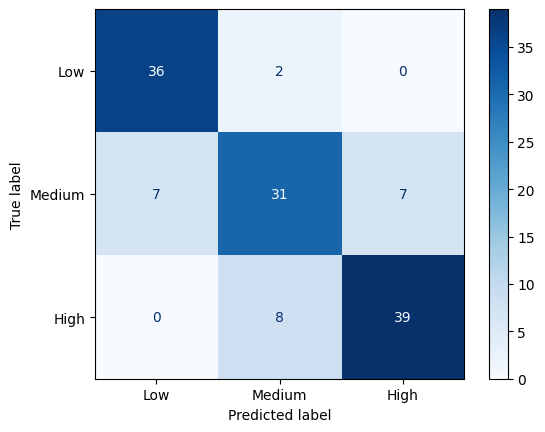

In [158]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low', 'Medium', 'High'])
disp.plot(cmap='Blues', values_format='d')

In [161]:
import seaborn as sns

### Feature Importance

<Axes: >

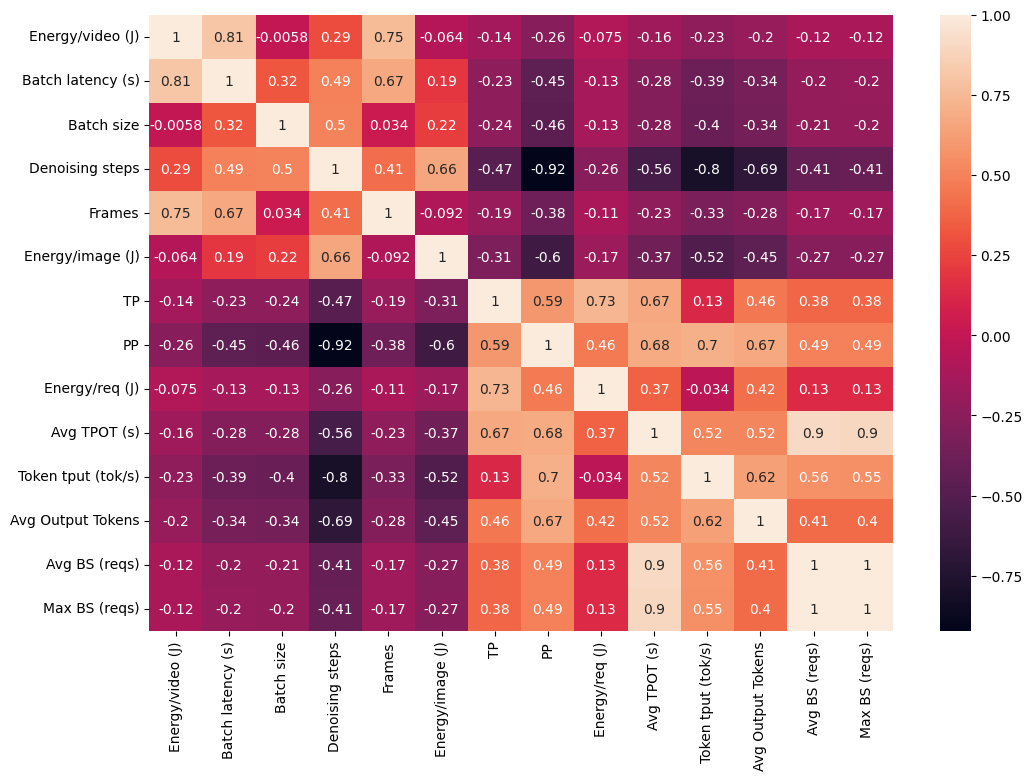

In [170]:
plt.figure(figsize=(12,8))
sns.heatmap((mlenergy_df.drop(columns=['Energy (J)', 'Energy Log Scaled','Energy Output Label','Model','GPU'])).corr(), annot=True)